In [1]:
%matplotlib inline
# import functions from python directory
import sys
sys.path.append("/home/bgreene/SBL_LES/python/")
import os
import seaborn
import cmocean
import numpy as np
import xarray as xr
from scipy.stats import gmean
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from LESnc import load_stats, load_full, MidPointNormalize

In [2]:
# plotting setup
rc('font',weight='normal',size=20,family='serif',serif='Times New Roman')
rc('text',usetex='True')
rc('figure',facecolor='white')

# Load Data

In [13]:
# directories
# figure save
figdir = "/home/bgreene/SBL_LES/figures/LSM/v3/"
# list of simulations to loop over
sims = ["cr0.10_u08", "cr0.25_u08", "cr0.33_u08", "cr0.50_u08",
        "cr1.00_u08", "cr1.50_u08", "cr2.00_u08", "cr2.50_u08"]
# empty list to construct paths and store
dnc_all = [] # directory paths
sall = []    # stats files
Eall = []    # spectrograms
Gall = []    # linear coherence spectra
Lall = []    # integral lengthscales
Rall = []    # amplitude modulation coefficients
# loop over sims and load stats, spectrogram data
for sim in sims:
    dnc = f"/home/bgreene/simulations/{sim}_192/output/netcdf/"
    dnc_all.append(dnc)
    # load stats file
    s = load_stats(dnc+"average_statistics.nc")
    sall.append(s)
    # load spectrogram file
    E = xr.load_dataset(dnc+"spectrogram.nc")
    Eall.append(E)
    # load LCS file
    g = xr.load_dataset(dnc+"G2.nc")
    Gall.append(g)
    # load lengthscale files
    l = xr.load_dataset(dnc+"L_vol.nc")
    Lall.append(l)
    # load amplitude modulation coefficients
    r = xr.load_dataset(dnc+"AM_coefficients.nc")
    Rall.append(r)

# define colormap based on number of simulations
nsim = len(sims)
# cmap1 = seaborn.color_palette("cubehelix_r", 8)
cmap2 = seaborn.color_palette("cubehelix_r", as_cmap=True)
cmap2_r = seaborn.color_palette("cubehelix", as_cmap=True)
cmap3 = cmocean.cm.balance
cmap1 = seaborn.cubehelix_palette(n_colors=nsim, start=0, rot=-1, gamma=1, hue=1, 
                                 light=0.8, dark=0.1, reverse=True)
dash = [(1,()),
        (0, (5, 1)),
        (0, (1, 1)),
        (0, (3, 1, 1, 1)),
        (0, (3, 1, 1, 1, 1, 1)),
        (0, (3, 1, 3, 1, 1, 1, 1, 1)),
        (0, (3, 1, 1, 1)),
        (0, (3, 1)),
        (1, ())]

Reading file: /home/bgreene/simulations/cr0.10_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr0.25_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr0.33_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr0.50_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr1.00_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr1.50_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr2.00_u08_192/output/netcdf/average_statistics.nc
Reading file: /home/bgreene/simulations/cr2.50_u08_192/output/netcdf/average_statistics.nc


# Plot Spectrograms

## $\phi_{uu}$, $\phi_{ww}$, $\phi_{\theta \theta}$

In [ ]:
# plot all sims, 1 per row
fig1, ax1 = plt.subplots(nrows=nsim, ncols=3, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(14, 5*nsim))
# plotting parameters
nlevel = 36
# loop over sims
for ii, (s, E) in enumerate(zip(sall, Eall)):
    cax1u = ax1[ii,0].contour(E.z/s.zj, 1/E.freq_x/s.zj, 
                              E.freq_x*E.uu/s.ustar0/s.ustar0,
                              levels=np.linspace(0.0, 1.0, nlevel), extend="max",
                              cmap=cmap2)
    cax1w = ax1[ii,1].contour(E.z/s.zj, 1/E.freq_x/s.zj, 
                              E.freq_x*E.ww/s.ustar0/s.ustar0,
                              levels=np.linspace(0.0, 0.4, nlevel), extend="max",
                              cmap=cmap2)
    cax1t = ax1[ii,2].contour(E.z/s.zj, 1/E.freq_x/s.zj, 
                              E.freq_x*E.tt/s.tstar0/s.tstar0,
                              levels=np.linspace(0.0, 1.0, nlevel), extend="max",
                              cmap=cmap2)
    # dashed line for h/zj
    [iax.axhline(s.he/s.zj, color="k", alpha=0.7) for iax in ax1[ii,:]]
    # line for L/zj
    [iax.axvline(s.L/s.zj, color="k", alpha=0.7) for iax in ax1[ii,:]]
    # text in upper left corner with stability
    ax1[ii,0].text(0.03, 0.90, s.label2, 
                   fontsize=16, transform=ax1[ii,0].transAxes)
# colorbars
cb1u = fig1.colorbar(cax1u, ax=ax1[:,0], location="top", 
                     ticks=MultipleLocator(0.2), pad=0.01)
cb1w = fig1.colorbar(cax1w, ax=ax1[:,1], location="top", 
                     ticks=MultipleLocator(0.1), pad=0.01)
cb1t = fig1.colorbar(cax1t, ax=ax1[:,2], location="top", 
                     ticks=MultipleLocator(0.2), pad=0.01)
# cb ticks
cb1u.ax.xaxis.set_ticks_position("bottom")
cb1w.ax.xaxis.set_ticks_position("bottom")
cb1t.ax.xaxis.set_ticks_position("bottom")
# cb labels
cb1u.ax.set_xlabel("$k_x \\Phi_{uu} / u_*^2$", fontsize=24, labelpad=10, fontweight="bold")
cb1w.ax.set_xlabel("$k_x \\Phi_{ww} / u_*^2$", fontsize=24, labelpad=10, fontweight="bold")
cb1t.ax.set_xlabel("$k_x \\Phi_{\\theta\\theta} / \\theta_*^2$", fontsize=24, labelpad=10, fontweight="bold")

# clean up
# log axes
ax1[0,0].set_xscale("log")
ax1[0,0].set_yscale("log")
ax1[0,0].set_ylim([1e-1, 1e1])
ax1[0,0].set_xlim([1e-2, 1.4e0])
[iax.set_xlabel("$z/z_j$") for iax in ax1[-1,:]]
[iax.set_ylabel("$\\lambda_x / z_j$") for iax in ax1[:,0]]
# save figure
fsave = f"{figdir}spectrogram_u_w_t.pdf"
# fig1.savefig(fsave)

## $\phi_{uw}$, $\phi_{\theta w}$, $\phi_{\theta u}$

In [ ]:
# plot all sims, 1 per row
fig2, ax2 = plt.subplots(nrows=nsim, ncols=3, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(14, 5*nsim))
# plotting parameters
nlevel = 36
norm=MidPointNormalize(midpoint=0.0)
# loop over sims
for ii, (s, E) in enumerate(zip(sall, Eall)):
    cax2uw = ax2[ii,0].contour(E.z/s.zj, 1/E.freq_x/s.zj, 
                               E.freq_x*E.uw/s.ustar0/s.ustar0,
                               levels=np.linspace(-0.25, 0.0, nlevel), extend="both",
                               cmap=cmap2_r)
    cax2tw = ax2[ii,1].contour(E.z/s.zj, 1/E.freq_x/s.zj, 
                               E.freq_x*E.tw/s.tstar0/s.ustar0,
                               levels=np.linspace(-0.25, 0.0, nlevel), extend="both",
                               cmap=cmap2_r)
    cax2tu = ax2[ii,2].contour(E.z/s.zj, 1/E.freq_x/s.zj, 
                               E.freq_x*E.tu/s.tstar0/s.ustar0,
                               levels=np.linspace(-0.2, 0.6, nlevel), extend="both",
                               cmap=cmap3, norm=norm)
    # dashed line for h/zj
    [iax.axhline(s.he/s.zj, color="k", alpha=0.7) for iax in ax2[ii,:]]
    # line for L/zj
    [iax.axvline(s.L/s.zj, color="k", alpha=0.7) for iax in ax2[ii,:]]
    # text in upper left corner with stability
    ax2[ii,0].text(0.03, 0.90, s.label2, 
                   fontsize=16, transform=ax2[ii,0].transAxes)
# colorbars
cb2uw = fig1.colorbar(cax2uw, ax=ax2[:,0], location="top", 
                      ticks=MultipleLocator(0.1), pad=0.01)
cb2tw = fig1.colorbar(cax2tw, ax=ax2[:,1], location="top", 
                      ticks=MultipleLocator(0.1), pad=0.01)
cb2tu = fig1.colorbar(cax2tu, ax=ax2[:,2], location="top", 
                      ticks=MultipleLocator(0.2), pad=0.01)
# cb ticks
cb2uw.ax.xaxis.set_ticks_position("bottom")
cb2tw.ax.xaxis.set_ticks_position("bottom")
cb2tu.ax.xaxis.set_ticks_position("bottom")
# cb labels
cb2uw.ax.set_xlabel("$k_x \\Phi_{uw} / u_*^2$", fontsize=24, labelpad=10, fontweight="bold")
cb2tw.ax.set_xlabel("$k_x \\Phi_{\\theta w} / \\theta_* u_*$", fontsize=24, labelpad=10, fontweight="bold")
cb2tu.ax.set_xlabel("$k_x \\Phi_{\\theta u} / \\theta_* u_*$", fontsize=24, labelpad=10, fontweight="bold")

# clean up
# log axes
ax2[0,0].set_xscale("log")
ax2[0,0].set_yscale("log")
ax2[0,0].set_ylim([1e-1, 1e1])
ax2[0,0].set_xlim([1e-2, 1.4e0])
[iax.set_xlabel("$z/z_j$") for iax in ax2[-1,:]]
[iax.set_ylabel("$\\lambda_x / z_j$") for iax in ax2[:,0]]
# save figure
fsave = f"{figdir}spectrogram_uw_tw_tu.pdf"
# fig2.savefig(fsave)

## $\phi_{uu}, \phi_{ww}, \phi_{\theta \theta}, \phi_{uw}, \phi_{\theta w}$

In [ ]:
# plot all sims, 1 per column
fig1, ax1 = plt.subplots(nrows=5, ncols=nsim, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(3*nsim, 12))
# plotting parameters
nlevel = 15
# loop over sims
for ii, (s, E) in enumerate(zip(sall, Eall)):
    # row 1
    cax1u = ax1[0,ii].contour(E.z/s.h, 1/E.freq_x/s.h, 
                              E.freq_x*E.uu/s.ustar0/s.ustar0,
                              levels=np.linspace(0.0, 1.0, nlevel), extend="max",
                              cmap=cmap2)
    # row 2
    cax1w = ax1[1,ii].contour(E.z/s.h, 1/E.freq_x/s.h, 
                              E.freq_x*E.ww/s.ustar0/s.ustar0,
                              levels=np.linspace(0.0, 0.4, nlevel), extend="max",
                              cmap=cmap2)
    # row 3
    cax1t = ax1[2,ii].contour(E.z/s.h, 1/E.freq_x/s.h, 
                              E.freq_x*E.tt/s.tstar0/s.tstar0,
                              levels=np.linspace(0.0, 0.8, nlevel), extend="max",
                              cmap=cmap2)
    # row 4
    cax1uw = ax1[3,ii].contour(E.z/s.h, 1/E.freq_x/s.h, 
                               E.freq_x*E.uw/s.ustar0/s.ustar0,
                               levels=np.linspace(-0.2, 0.0, nlevel), extend="min",
                               cmap=cmap2_r)
    # row 5
    cax1tw = ax1[4,ii].contour(E.z/s.h, 1/E.freq_x/s.h, 
                               E.freq_x*E.tw/s.tstar0/s.ustar0,
                               levels=np.linspace(-0.2, 0.0, nlevel), extend="min",
                               cmap=cmap2_r)
    # horizontal line for cutoff wavelength zj/2
    [iax.axhline(s.zj/2/s.h, color="k", lw=0.7) for iax in ax1[:,ii]]
    # vertical line for LLJ height zj
    [iax.axvline(s.L/s.h, color="k", lw=0.7) for iax in ax1[:,ii]]
    # title each column for stability
    ax1[0,ii].set_title(s.lab)
# colorbars
cb1u = fig1.colorbar(cax1u, ax=ax1[0,:], location="right", 
                     ticks=MultipleLocator(0.5), pad=0.01)
cb1w = fig1.colorbar(cax1w, ax=ax1[1,:], location="right", 
                     ticks=MultipleLocator(0.2), pad=0.01)
cb1t = fig1.colorbar(cax1t, ax=ax1[2,:], location="right", 
                     ticks=MultipleLocator(0.4), pad=0.01)
cb1uw = fig1.colorbar(cax1uw, ax=ax1[3,:], location="right", 
                      ticks=MultipleLocator(0.1), pad=0.01)
cb1tw = fig1.colorbar(cax1tw, ax=ax1[4,:], location="right", 
                      ticks=MultipleLocator(0.1), pad=0.01)
# cb labels
cb1u.ax.set_ylabel("$k_x \\Phi_{uu} / u_*^2$", fontsize=24, labelpad=10, fontweight="bold")
cb1w.ax.set_ylabel("$k_x \\Phi_{ww} / u_*^2$", fontsize=24, labelpad=10, fontweight="bold")
cb1t.ax.set_ylabel("$k_x \\Phi_{\\theta\\theta} / \\theta_*^2$", fontsize=24, labelpad=10, fontweight="bold")
cb1uw.ax.set_ylabel("$k_x \\Phi_{uw} / u_*^2$", fontsize=24, labelpad=10, fontweight="bold")
cb1tw.ax.set_ylabel("$k_x \\Phi_{\\theta w} / \\theta_* u_*$", fontsize=24, labelpad=10, fontweight="bold")
# log axes
ax1[0,0].set_xscale("log")
ax1[0,0].set_yscale("log")
ax1[0,0].set_ylim([3e-2, 1e1])
ax1[0,0].set_xlim([4e-3, 1e0])
[iax.set_xlabel("$z/h$") for iax in ax1[-1,:]]
[iax.set_ylabel("$\\lambda_x / h$") for iax in ax1[:,0]]
# subplot labels
labels = [chr(i) for i in range(ord("a"),ord("z"))]
for iax, lab in zip(ax1.flatten(), labels):
    iax.text(0.03, 0.90, f"$\\textbf{{({{{lab}}})}}$", 
             fontsize=16, transform=iax.transAxes)
# save figure
fsave = f"{figdir}spectrogram_u_w_t_uw_tw_A-E.eps"
fig1.savefig(fsave)

# Plot 1D Spectra at $z = \Lambda(z)$ across simulations

In [ ]:
# plot all sims
fig1, ax1 = plt.subplots(nrows=3, ncols=3, constrained_layout=True,
                         sharex=True, sharey="row", 
                         figsize=(14, 12))
# each column is different value of Lambda
# loop over sims
for ii, (s, E) in enumerate(zip(sall, Eall)):
    # find jz where z == Lambda, 2Lambda, 0.5Lambda
    jz1 = abs(s.z-(0.5*s.LL)).argmin()
    jz2 = abs(s.z-(s.LL)).argmin()
    jz3 = abs(s.z-(2*s.LL)).argmin()
    # grab value of Lambda
    LL1 = s.LL[jz1].values
    LL2 = s.LL[jz2].values
    LL3 = s.LL[jz3].values
    # plot 1d spectra
    # row 1: uu
    ax1[0,0].plot(1/E.freq_x/LL1, E.freq_x*E.uu.isel(z=jz1) / s.ustar[jz1]/s.ustar[jz1], 
                  ls="-", lw=2, c=cmap1[ii], label=s.label3)
    ax1[0,1].plot(1/E.freq_x/LL2, E.freq_x*E.uu.isel(z=jz2) / s.ustar[jz2]/s.ustar[jz2], 
                  ls="-", lw=2, c=cmap1[ii], label=s.label3)
    ax1[0,2].plot(1/E.freq_x/LL3, E.freq_x*E.uu.isel(z=jz3) / s.ustar[jz3]/s.ustar[jz3], 
                  ls="-", lw=2, c=cmap1[ii], label=s.label3)
    # row 2: ww
    ax1[1,0].plot(1/E.freq_x/LL1, E.freq_x*E.ww.isel(z=jz1) / s.ustar[jz1]/s.ustar[jz1], ls="-", lw=2, c=cmap1[ii])    
    ax1[1,1].plot(1/E.freq_x/LL2, E.freq_x*E.ww.isel(z=jz2) / s.ustar[jz2]/s.ustar[jz2], ls="-", lw=2, c=cmap1[ii])    
    ax1[1,2].plot(1/E.freq_x/LL3, E.freq_x*E.ww.isel(z=jz3) / s.ustar[jz3]/s.ustar[jz3], ls="-", lw=2, c=cmap1[ii])    
    # row 3: uw
    ax1[2,0].plot(1/E.freq_x/LL1, E.freq_x*abs(E.uw.isel(z=jz1)) / s.ustar[jz1]/s.ustar[jz1], ls="-", lw=2, c=cmap1[ii])
    ax1[2,1].plot(1/E.freq_x/LL2, E.freq_x*abs(E.uw.isel(z=jz2)) / s.ustar[jz2]/s.ustar[jz2], ls="-", lw=2, c=cmap1[ii])
    ax1[2,2].plot(1/E.freq_x/LL3, E.freq_x*abs(E.uw.isel(z=jz3)) / s.ustar[jz3]/s.ustar[jz3], ls="-", lw=2, c=cmap1[ii])
    # plot vertical dashed line for Ozmidov scale
    # ax1[0].axvline(LL/s.Lo[jz], ls="--", c=cmap1[ii])

# make axes log
ax1[0,0].set_xscale("log")
for iax in ax1[:,0]:
    iax.set_yscale("log")
# axis limits
# ax1[0].set_xlim([1e-2, 1e3])
# ax1[0].set_ylim([1e-5, 1e-1])
# axis labels
for iax in ax1[2,:]:
    iax.set_xlabel("$\\lambda_x / \\Lambda$")
ax1[0,0].set_ylabel("$k_x E_{uu} / u_{*}^2$")
ax1[1,0].set_ylabel("$k_x E_{ww} / u_{*}^2$")
ax1[2,0].set_ylabel("$k_x E_{uw} / u_{*}^2$")
# legend
ax1[0,0].legend(fontsize=14)
# titles for readability
ax1[0,0].set_title("$z = 0.5\\Lambda$")
ax1[0,1].set_title("$z = \\Lambda$")
ax1[0,2].set_title("$z = 2\\Lambda$")

# Plot Linear Coherence Spectra

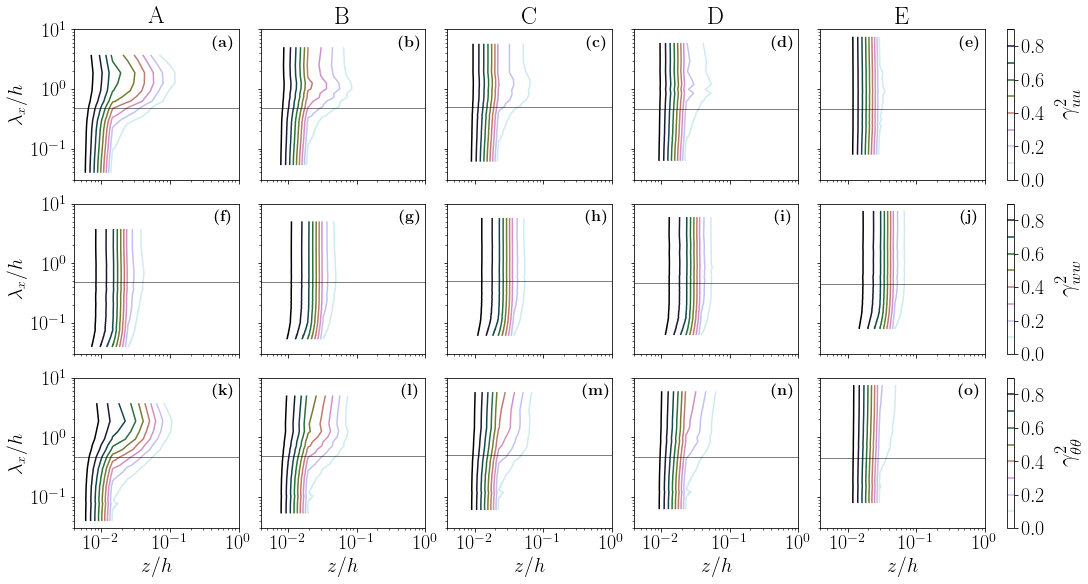

In [6]:
# plot all sims, 1 per column
fig3, ax3 = plt.subplots(nrows=3, ncols=nsim, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(3*nsim, 8))
levelG = np.linspace(0, 0.9, 10)
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    # G2u
    cax3u = ax3[0,ii].contour(g.z/s.h, 1./g.freq_x/s.h, g.u0, cmap=cmap2, levels=levelG)
    # G2w
    cax3w = ax3[1,ii].contour(g.z/s.h, 1./g.freq_x/s.h, g.w0, cmap=cmap2, levels=levelG)
    # G2t
    cax3t = ax3[2,ii].contour(g.z/s.h, 1./g.freq_x/s.h, g.theta0, cmap=cmap2, levels=levelG)
    # dashed vert line for L/h
    # [iax.axvline(s.L/s.h, color="k", lw=0.5) for iax in ax3[:,ii]]
    # dashed horiz line for zj/2
    [iax.axhline(s.zj/2/s.h, color="k", lw=0.5) for iax in ax3[:,ii]]
    # title columns
    ax3[0,ii].set_title(s.lab)
# colorbars
cb3u = fig3.colorbar(cax3u, ax=ax3[0,:], location="right", 
                     ticks=MultipleLocator(0.2), pad=0.01)
cb3w = fig3.colorbar(cax3w, ax=ax3[1,:], location="right", 
                     ticks=MultipleLocator(0.2), pad=0.01)
cb3t = fig3.colorbar(cax3t, ax=ax3[2,:], location="right", 
                     ticks=MultipleLocator(0.2), pad=0.01)
# cb labels
cb3u.ax.set_ylabel("$\\gamma_{uu}^2$", fontsize=24, labelpad=10, fontweight="bold")
cb3w.ax.set_ylabel("$\\gamma_{ww}^2$", fontsize=24, labelpad=10, fontweight="bold")
cb3t.ax.set_ylabel("$\\gamma_{\\theta \\theta}^2$", fontsize=24, labelpad=10, fontweight="bold")
# make axes log-log
ax3[0,0].set_xscale("log")
ax3[0,0].set_yscale("log")
# axis limits
ax3[0,0].set_ylim([3e-2, 1e1])
ax3[0,0].set_xlim([4e-3, 1e0])
# axis labels
[iax.set_xlabel("$z/h$") for iax in ax3[-1,:]]
[iax.set_ylabel("$\\lambda_x / h$") for iax in ax3[:,0]]
# subplot labels
labels = [chr(i) for i in range(ord("a"),ord("p"))]
for iax, lab in zip(ax3.flatten(), labels):
    iax.text(0.6, 6, f"$\\textbf{{({{{lab}}})}}$", 
             fontsize=16, ha="center", va="center")
# save figure
fsave = f"{figdir}LCS_u_w_t_sfc.pdf"
fig3.savefig(fsave)

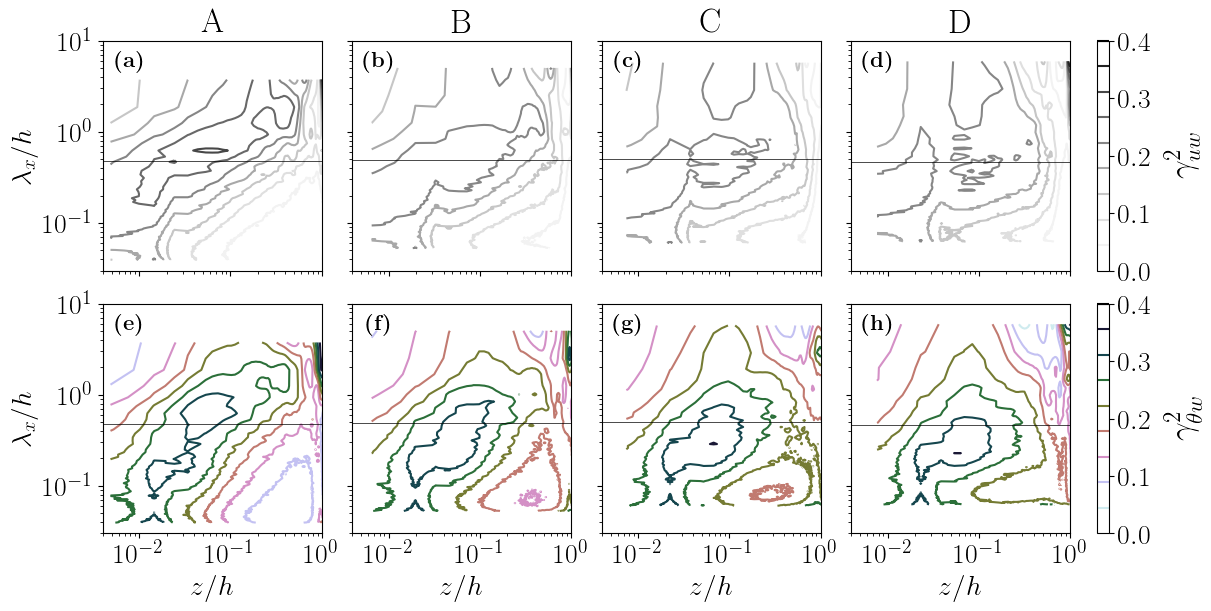

In [6]:
# plot all sims, 1 per column
fig3, ax3 = plt.subplots(nrows=2, ncols=nsim, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(3*nsim, 6))
levelG = np.linspace(0, 0.4, 10)
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    # G2u
    cax3u = ax3[0,ii].contour(g.z/s.h, 1./g.freq_x/s.h, g.uw, cmap=plt.get_cmap("Greys"), levels=levelG)
    # G2w
    cax3w = ax3[1,ii].contour(g.z/s.h, 1./g.freq_x/s.h, g.tw, cmap=cmap2, levels=levelG)
    # dashed vert line for L/h
    # [iax.axvline(s.L/s.h, color="k", lw=0.5) for iax in ax3[:,ii]]
    # dashed horiz line for zj/2
    [iax.axhline(s.zj/2/s.h, color="k", lw=0.5) for iax in ax3[:,ii]]
    # title columns
    ax3[0,ii].set_title(s.lab)
# colorbars
cb3u = fig3.colorbar(cax3u, ax=ax3[0,:], location="right", 
                     ticks=MultipleLocator(0.1), pad=0.01)
cb3w = fig3.colorbar(cax3w, ax=ax3[1,:], location="right", 
                     ticks=MultipleLocator(0.1), pad=0.01)
# cb labels
cb3u.ax.set_ylabel("$\\gamma_{uw}^2$", fontsize=24, labelpad=10, fontweight="bold")
cb3w.ax.set_ylabel("$\\gamma_{\\theta w}^2$", fontsize=24, labelpad=10, fontweight="bold")
# make axes log-log
ax3[0,0].set_xscale("log")
ax3[0,0].set_yscale("log")
# axis limits
ax3[0,0].set_ylim([3e-2, 1e1])
ax3[0,0].set_xlim([4e-3, 1e0])
# axis labels
[iax.set_xlabel("$z/h$") for iax in ax3[-1,:]]
[iax.set_ylabel("$\\lambda_x / h$") for iax in ax3[:,0]]
# subplot labels
labels = [chr(i) for i in range(ord("a"),ord("l"))]
for iax, lab in zip(ax3.flatten(), labels):
    iax.text(0.008, 6, f"$\\textbf{{({{{lab}}})}}$", 
             fontsize=16, ha="center", va="center")
# save figure
fsave = f"{figdir}LCS_uw_tw.eps"
# fig3.savefig(fsave)

5
3
3
3


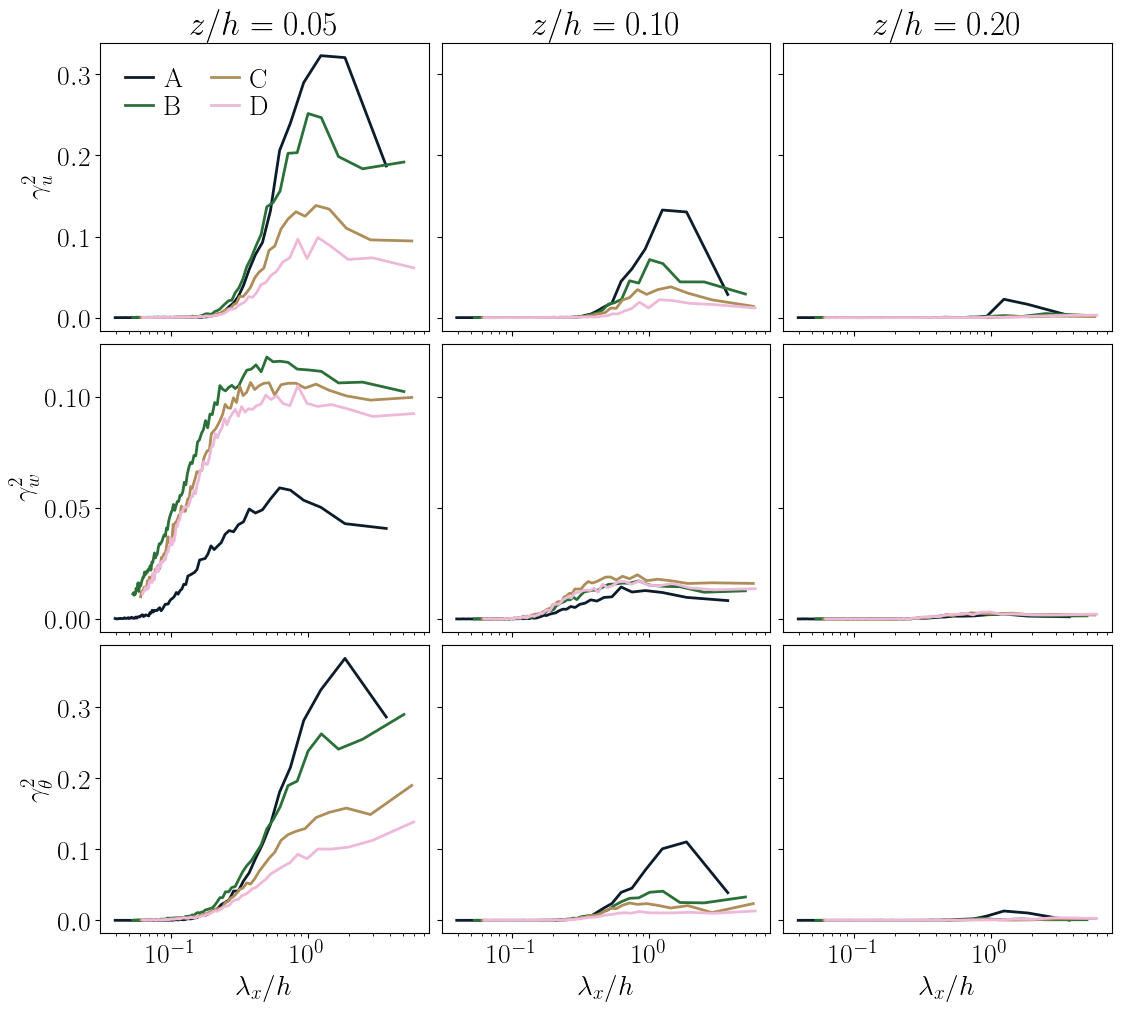

In [5]:
# plot cross section of u,w,T at z/h = 0.5
fig3, ax3 = plt.subplots(nrows=3, ncols=3, sharex=True, sharey="row", figsize=(11.1, 10), constrained_layout=True)
# loop over sims
for ii, (s, g) in enumerate(zip(sall[:4], Gall[:4])):
    # indices for heights
    zh = g.z / s.h
    jz1 = abs(zh - 0.05).argmin()
    print(jz1.values)
    jz2 = abs(zh - 0.1).argmin()
    jz3 = abs(zh - 0.2).argmin()
    # plot
    # row 1: u
    ax3[0,0].plot(1./g.freq_x/s.h, g.u0.isel(z=jz1), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[0,1].plot(1./g.freq_x/s.h, g.u0.isel(z=jz2), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[0,2].plot(1./g.freq_x/s.h, g.u0.isel(z=jz3), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    # row 2: w
    ax3[1,0].plot(1./g.freq_x/s.h, g.w0.isel(z=jz1), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[1,1].plot(1./g.freq_x/s.h, g.w0.isel(z=jz2), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[1,2].plot(1./g.freq_x/s.h, g.w0.isel(z=jz3), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    # row 2: w
    ax3[2,0].plot(1./g.freq_x/s.h, g.theta0.isel(z=jz1), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[2,1].plot(1./g.freq_x/s.h, g.theta0.isel(z=jz2), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[2,2].plot(1./g.freq_x/s.h, g.theta0.isel(z=jz3), label=s.lab, c=cmap1[ii], ls="-", lw=2)
# label columns
ax3[0,0].set_title("$z/h = 0.05$")
ax3[0,1].set_title("$z/h = 0.10$")
ax3[0,2].set_title("$z/h = 0.20$")
# vertical line on each for lambda_x/z_j = 0.5 (separates large and small scales)
# for iax in ax3.flatten():
#     iax.axvline(0.5, lw=0.5, c="k", ls="-")
# label axes
ax3[0,0].set_ylabel("$\\gamma^2_{u}$")
ax3[1,0].set_ylabel("$\\gamma^2_{w}$")
ax3[2,0].set_ylabel("$\\gamma^2_{\\theta}$")
for iax in ax3[-1,:]:
    iax.set_xlabel("$\\lambda_x / h$")
# x-axis log
ax3[0,0].set_xscale("log")
# axis limits
# ax3[0,0].set_xlim([2e-2, 2e1])
# ax3[0,0].set_ylim([0, 0.4])
# ax3[1,0].set_ylim([0, 0.2])
# ax3[2,0].set_ylim([0, 0.4])
# legend
ax3[0,0].legend(frameon=False, labelspacing=0.10, ncol=2, columnspacing=1,
                handletextpad=0.4, handlelength=1, loc="upper left")
# save figure
fsave = f"{figdir}LCS_uwT_zh_sfc.eps"
# fig3.savefig(fsave)

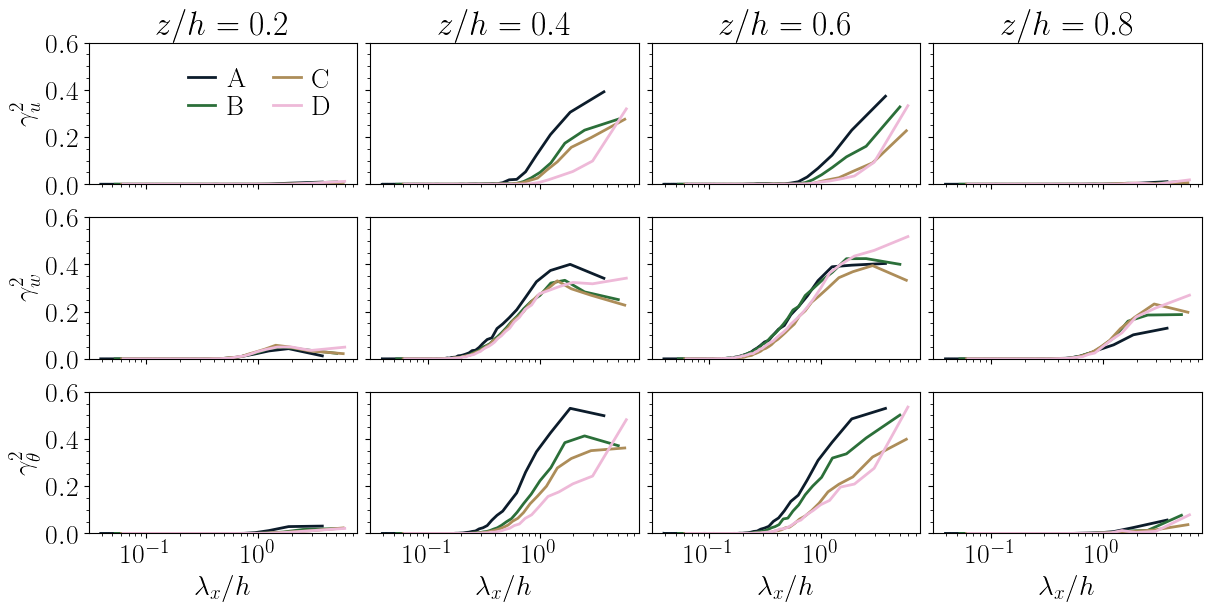

In [4]:
# plot cross section of u,w,T at z/h = 0.5
fig3, ax3 = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(12, 6), constrained_layout=True)
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    # indices for heights
    zh = g.z / s.h
    jz1 = abs(zh - 0.2).argmin()
    jz2 = abs(zh - 0.4).argmin()
    jz3 = abs(zh - 0.6).argmin()
    jz4 = abs(zh - 0.8).argmin()
    # plot
    # row 1: u
    ax3[0,0].plot(1./g.freq_x/s.h, g.u2.isel(z=jz1), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[0,1].plot(1./g.freq_x/s.h, g.u2.isel(z=jz2), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[0,2].plot(1./g.freq_x/s.h, g.u2.isel(z=jz3), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[0,3].plot(1./g.freq_x/s.h, g.u2.isel(z=jz4), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    # row 2: w
    ax3[1,0].plot(1./g.freq_x/s.h, g.w2.isel(z=jz1), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[1,1].plot(1./g.freq_x/s.h, g.w2.isel(z=jz2), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[1,2].plot(1./g.freq_x/s.h, g.w2.isel(z=jz3), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[1,3].plot(1./g.freq_x/s.h, g.w2.isel(z=jz4), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    # row 2: w
    ax3[2,0].plot(1./g.freq_x/s.h, g.theta2.isel(z=jz1), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[2,1].plot(1./g.freq_x/s.h, g.theta2.isel(z=jz2), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[2,2].plot(1./g.freq_x/s.h, g.theta2.isel(z=jz3), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[2,3].plot(1./g.freq_x/s.h, g.theta2.isel(z=jz4), label=s.lab, c=cmap1[ii], ls="-", lw=2)
# label columns
ax3[0,0].set_title("$z/h = 0.2$")
ax3[0,1].set_title("$z/h = 0.4$")
ax3[0,2].set_title("$z/h = 0.6$")
ax3[0,3].set_title("$z/h = 0.8$")
# vertical line on each for lambda_x/z_j = 0.5 (separates large and small scales)
# for iax in ax3.flatten():
#     iax.axvline(0.5, lw=0.5, c="k", ls="-")
# label axes
ax3[0,0].set_ylabel("$\\gamma^2_{u}$")
ax3[1,0].set_ylabel("$\\gamma^2_{w}$")
ax3[2,0].set_ylabel("$\\gamma^2_{\\theta}$")
for iax in ax3[-1,:]:
    iax.set_xlabel("$\\lambda_x / h$")
# x-axis log
ax3[0,0].set_xscale("log")
# axis limits
# ax3[0,0].set_xlim([2e-2, 2e1])
ax3[0,0].set_ylim([0, 0.6])
# axis ticks
ax3[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax3[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
# legend
ax3[0,0].legend(frameon=False, labelspacing=0.10, ncol=2, columnspacing=1,
                handletextpad=0.4, handlelength=1, loc="upper right")
# save figure
fsave = f"{figdir}LCS_uwT_zh.eps"
# fig3.savefig(fsave)

## Plot cross-sections of LCS at constant values of $z/z_j$

In [ ]:
# uw and tw on 1 panel, different panel for each stability
# 1 row per height
# row 1: z/zj = 0.1
# row 2: z/zj = 0.5
# row 3: z/zj = 1.0
fig3, ax3 = plt.subplots(nrows=3, ncols=nsim, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(2.5*nsim, 10))
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    # row 1
    zzj = g.z / s.zj
    jz1 = abs(zzj - 0.1).argmin()
    # plot
    ax3[0,ii].plot(1./g.freq_x/s.zj, g.uw.isel(z=jz1), label="$uw$", c="k", ls="-", lw=2)
    ax3[0,ii].plot(1./g.freq_x/s.zj, g.tw.isel(z=jz1), label="$\\theta w$", c="b", ls="-", lw=2)
    # row 2
    jz2 = abs(zzj - 0.5).argmin()
    # plot
    ax3[1,ii].plot(1./g.freq_x/s.zj, g.uw.isel(z=jz2), label="$uw$", c="k", ls="-", lw=2)
    ax3[1,ii].plot(1./g.freq_x/s.zj, g.tw.isel(z=jz2), label="$\\theta w$", c="b", ls="-", lw=2)
    # row 3
    jz3 = abs(zzj - 1.0).argmin()
    # plot
    ax3[2,ii].plot(1./g.freq_x/s.zj, g.uw.isel(z=jz3), label="$uw$", c="k", ls="-", lw=2)
    ax3[2,ii].plot(1./g.freq_x/s.zj, g.tw.isel(z=jz3), label="$\\theta w$", c="b", ls="-", lw=2)
    # label columns
    ax3[0,ii].set_title(s.label3)
# vertical line on each for lambda_x/z_j = 1
for iax in ax3.flatten():
    iax.axvline(1, lw=2, c="k", ls="-", alpha=0.4)
# label axes
for iax, zz in zip(ax3[:,0], [0.1, 0.5, 1.0]):
    iax.set_ylabel(f"$\\gamma^2$, $z/z_j = {{{zz}}}$")
for iax in ax3[-1,:]:
    iax.set_xlabel("$\\lambda_x / z_j$")
# x-axis log
ax3[0,0].set_xscale("log")
# axis limits
ax3[0,0].set_xlim([2e-2, 2e1])
ax3[0,0].set_ylim([0, 0.4])
# legend
ax3[0,0].legend()

In [ ]:
# same as previous, but for z = n*Lambda
# 1 row per height
# row 1: z = 0.5 Lambda
# row 2: z = 1.0 Lambda
# row 3: z = 2.0 Lambda
fig3, ax3 = plt.subplots(nrows=3, ncols=nsim, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(2.5*nsim, 10))
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    # row 1
    jz1 = abs(g.z - 0.5*s.LL).argmin()
    # plot
    ax3[0,ii].plot(1./g.freq_x/s.LL[jz1], g.uw.isel(z=jz1), label="$uw$", c="k", ls="-", lw=2)
    ax3[0,ii].plot(1./g.freq_x/s.LL[jz1], g.tw.isel(z=jz1), label="$\\theta w$", c="b", ls="-", lw=2)
    # row 2
    jz2 = abs(g.z - s.LL).argmin()
    # plot
    ax3[1,ii].plot(1./g.freq_x/s.LL[jz2], g.uw.isel(z=jz2), label="$uw$", c="k", ls="-", lw=2)
    ax3[1,ii].plot(1./g.freq_x/s.LL[jz2], g.tw.isel(z=jz2), label="$\\theta w$", c="b", ls="-", lw=2)
    # row 3
    jz3 = abs(g.z - 2.0*s.LL).argmin()
    # plot
    ax3[2,ii].plot(1./g.freq_x/s.LL[jz3], g.uw.isel(z=jz3), label="$uw$", c="k", ls="-", lw=2)
    ax3[2,ii].plot(1./g.freq_x/s.LL[jz3], g.tw.isel(z=jz3), label="$\\theta w$", c="b", ls="-", lw=2)
    # label columns
    ax3[0,ii].set_title(s.label3)
# vertical line on each for lambda_x/Lambda = 1
for iax in ax3[0,:]:
    iax.axvline(0.5, lw=2, c="k", ls="-", alpha=0.4)
for iax in ax3[1,:]:
    iax.axvline(1, lw=2, c="k", ls="-", alpha=0.4)
for iax in ax3[2,:]:
    iax.axvline(2, lw=2, c="k", ls="-", alpha=0.4)
# label axes
for iax, zz in zip(ax3[:,0], [0.5, 1.0, 2.0]):
    iax.set_ylabel(f"$\\gamma^2$, $z/\\Lambda = {{{zz}}}$")
for iax in ax3[-1,:]:
    iax.set_xlabel("$\\lambda_x / \\Lambda$")
# x-axis log
ax3[0,0].set_xscale("log")
# axis limits
# ax3[0,0].set_xlim([2e-2, 2e1])
# ax3[0,0].set_ylim([0, 0.4])
# legend
ax3[0,0].legend()

In [ ]:
# plot uw and tw separately (rows), all stabilities for given height (col)
# row 1: uw
# row 2: tw
# col 1: z/zj = 0.1
# col 2: z/zj = 0.5
# col 3: z/zj = 1.0
fig3, ax3 = plt.subplots(nrows=2, ncols=3, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(14.8, 10))
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    # row 1
    zzj = g.z / s.zj
    jz1 = abs(zzj - 0.1).argmin()
    jz2 = abs(zzj - 0.5).argmin()
    jz3 = abs(zzj - 1.0).argmin()
    # plot
    ax3[0,0].plot(1./g.freq_x/s.zj, g.uw.isel(z=jz1), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    ax3[0,1].plot(1./g.freq_x/s.zj, g.uw.isel(z=jz2), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    ax3[0,2].plot(1./g.freq_x/s.zj, g.uw.isel(z=jz3), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    # row 2
    ax3[1,0].plot(1./g.freq_x/s.zj, g.tw.isel(z=jz1), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    ax3[1,1].plot(1./g.freq_x/s.zj, g.tw.isel(z=jz2), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    ax3[1,2].plot(1./g.freq_x/s.zj, g.tw.isel(z=jz3), label=s.label3, c=cmap1[ii], ls="-", lw=2)
# label columns
for iax, zz in zip(ax3[0,:], [0.1, 0.5, 1.0]):
    iax.set_title(f"$z/z_j = {{{zz}}}$")
# vertical line on each for lambda_x/z_j = 1
for iax in ax3.flatten():
    iax.axvline(1, lw=0.5, c="k", ls="-")
# label axes
ax3[0,0].set_ylabel("$\\gamma^2_{uw}$")
ax3[1,0].set_ylabel("$\\gamma^2_{\\theta w}$")
for iax in ax3[-1,:]:
    iax.set_xlabel("$\\lambda_x / z_j$")
# x-axis log
ax3[0,0].set_xscale("log")
# axis limits
ax3[0,0].set_xlim([3e-2, 2e1])
ax3[0,0].set_ylim([0, 0.4])
# legend
ax3[0,2].legend(fontsize=14)
# save figure
fsave = f"{figdir}LCS_uw_tw_zzj.pdf"
# fig3.savefig(fsave)

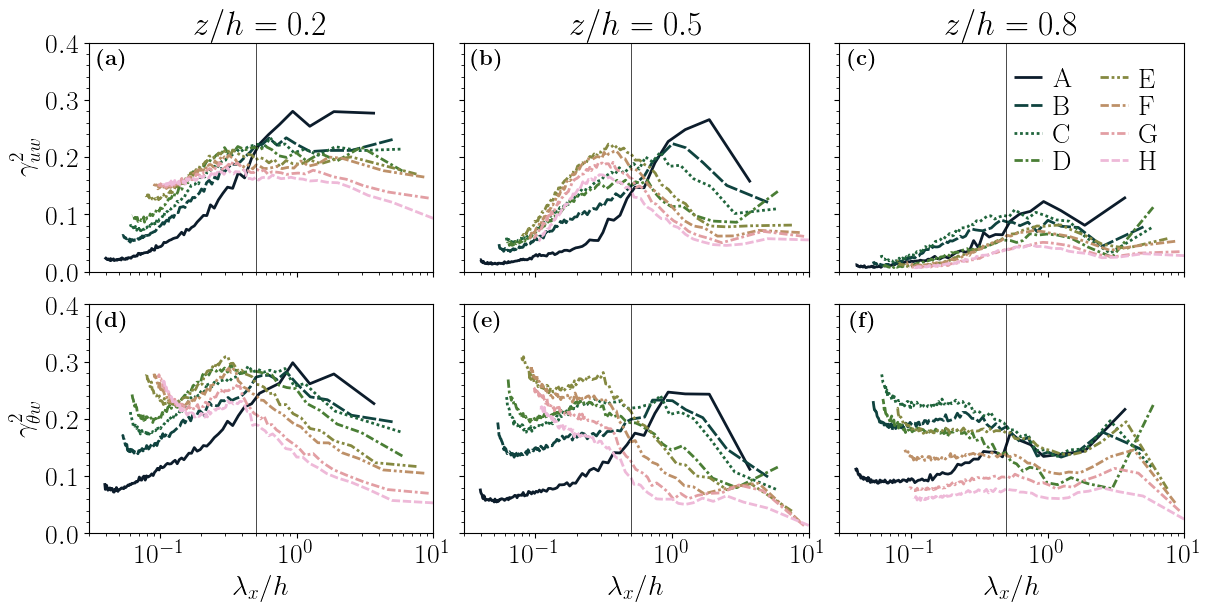

In [14]:
# plot uw and tw separately (rows), all stabilities for given height (col)
# row 1: uw
# row 2: tw
# col 1: z/h = 0.1
# col 2: z/h = 0.5
# col 3: z/h = 1.0
fig3, ax3 = plt.subplots(nrows=2, ncols=3, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(12, 6))
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    # row 1
    zh = g.z / s.h
    jz1 = abs(zh - 0.2).argmin()
    jz2 = abs(zh - 0.5).argmin()
    jz3 = abs(zh - 0.8).argmin()
    # plot
    ax3[0,0].plot(1./g.freq_x/s.h, g.uw.isel(z=jz1), label=s.lab, c=cmap1[ii], ls=dash[ii], lw=2)
    ax3[0,1].plot(1./g.freq_x/s.h, g.uw.isel(z=jz2), label=s.lab, c=cmap1[ii], ls=dash[ii], lw=2)
    ax3[0,2].plot(1./g.freq_x/s.h, g.uw.isel(z=jz3), label=s.lab, c=cmap1[ii], ls=dash[ii], lw=2)
    # row 2
    ax3[1,0].plot(1./g.freq_x/s.h, g.tw.isel(z=jz1), label=s.lab, c=cmap1[ii], ls=dash[ii], lw=2)
    ax3[1,1].plot(1./g.freq_x/s.h, g.tw.isel(z=jz2), label=s.lab, c=cmap1[ii], ls=dash[ii], lw=2)
    ax3[1,2].plot(1./g.freq_x/s.h, g.tw.isel(z=jz3), label=s.lab, c=cmap1[ii], ls=dash[ii], lw=2)
# label columns
for iax, zz in zip(ax3[0,:], [0.2, 0.5, 0.8]):
    iax.set_title(f"$z/h = {{{zz}}}$")
# vertical line on each for lambda_x/z_j = 1
for iax in ax3.flatten():
    iax.axvline(0.5, lw=0.5, c="k", ls="-")
# label axes
ax3[0,0].set_ylabel("$\\gamma^2_{uw}$")
ax3[1,0].set_ylabel("$\\gamma^2_{\\theta w}$")
for iax in ax3[-1,:]:
    iax.set_xlabel("$\\lambda_x / h$")
# x-axis log
ax3[0,0].set_xscale("log")
# axis limits
ax3[0,0].set_xlim([3e-2, 1e1])
ax3[0,0].set_ylim([0, 0.4])
# axis ticks
ax3[0,0].yaxis.set_major_locator(MultipleLocator(0.1))
ax3[0,0].yaxis.set_minor_locator(MultipleLocator(0.02))
# legend
ax3[0,2].legend(frameon=False, labelspacing=0.10, ncol=2, columnspacing=1,
                handletextpad=0.4, handlelength=1, loc="upper right")
# subplot labels
labels = [chr(i) for i in range(ord("a"),ord("g"))]
for iax, lab in zip(ax3.flatten(), labels):
    iax.text(0.045, 0.37, f"$\\textbf{{({{{lab}}})}}$", 
             fontsize=16, ha="center", va="center")
# save figure
fsave = f"{figdir}LCS_uw_tw_const-zh.pdf"
fig3.savefig(fsave)

In [ ]:
# same as previous but at constant values of z/Lambda
# plot uw and tw separately (rows), all stabilities for given height (col)
# row 1: uw
# row 2: tw
# col 1: z/Lambda = 1
# col 2: z/Lambda = 2
# col 3: z/Lambda = 3
fig3, ax3 = plt.subplots(nrows=2, ncols=3, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(14.8, 10))
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    # row 1
    jz1 = abs(g.z - 1*s.LL).argmin()
    jz2 = abs(g.z - 2*s.LL).argmin()
    jz3 = abs(g.z - 3*s.LL).argmin()
    # plot
    ax3[0,0].plot(1./g.freq_x/s.LL[jz1], g.uw.isel(z=jz1), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    ax3[0,1].plot(1./g.freq_x/s.LL[jz2], g.uw.isel(z=jz2), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    ax3[0,2].plot(1./g.freq_x/s.LL[jz3], g.uw.isel(z=jz3), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    # row 2
    ax3[1,0].plot(1./g.freq_x/s.LL[jz1], g.tw.isel(z=jz1), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    ax3[1,1].plot(1./g.freq_x/s.LL[jz2], g.tw.isel(z=jz2), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    ax3[1,2].plot(1./g.freq_x/s.LL[jz3], g.tw.isel(z=jz3), label=s.label3, c=cmap1[ii], ls="-", lw=2)
# label columns
for iax, zz in zip(ax3[0,:], [1.0, 2.0, 3.0]):
    iax.set_title(f"$z/\\Lambda = {{{zz}}}$")
# vertical line on each for lambda_x/Lambda
for iax in ax3[:,0]:
    iax.axvline(1, lw=2, c="k", ls="-", alpha=0.4)
for iax in ax3[:,1]:
    iax.axvline(2, lw=2, c="k", ls="-", alpha=0.4)
for iax in ax3[:,2]:
    iax.axvline(3, lw=2, c="k", ls="-", alpha=0.4)
# label axes
ax3[0,0].set_ylabel("$\\gamma^2_{uw}$")
ax3[1,0].set_ylabel("$\\gamma^2_{\\theta w}$")
for iax in ax3[-1,:]:
    iax.set_xlabel("$\\lambda_x / \\Lambda$")
# x-axis log
ax3[0,0].set_xscale("log")
# axis limits
# ax3[0,0].set_xlim([2e-2, 2e1])
# ax3[0,0].set_ylim([0, 0.4])
# legend
ax3[0,0].legend(fontsize=14)

In [ ]:
# same as previous but at constant values of z/Lo
# plot uw and tw separately (rows), all stabilities for given height (col)
# row 1: uw
# row 2: tw
# col 1: z/Lo = 1
# col 2: z/Lo = 2
# col 3: z/Lo = 3
fig3, ax3 = plt.subplots(nrows=2, ncols=3, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(14.8, 10))
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    # row 1
    jz1 = abs(g.z - 1*s.Lo).argmin()
    jz2 = abs(g.z - 2*s.Lo).argmin()
    jz3 = abs(g.z - 3*s.Lo).argmin()
    # plot
    ax3[0,0].plot(1./g.freq_x/s.Lo[jz1], g.uw.isel(z=jz1), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    ax3[0,1].plot(1./g.freq_x/s.Lo[jz2], g.uw.isel(z=jz2), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    ax3[0,2].plot(1./g.freq_x/s.Lo[jz3], g.uw.isel(z=jz3), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    # row 2
    ax3[1,0].plot(1./g.freq_x/s.Lo[jz1], g.tw.isel(z=jz1), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    ax3[1,1].plot(1./g.freq_x/s.Lo[jz2], g.tw.isel(z=jz2), label=s.label3, c=cmap1[ii], ls="-", lw=2)
    ax3[1,2].plot(1./g.freq_x/s.Lo[jz3], g.tw.isel(z=jz3), label=s.label3, c=cmap1[ii], ls="-", lw=2)
# label columns
for iax, zz in zip(ax3[0,:], [1, 2, 3]):
    iax.set_title(f"$z/L_o = {{{zz}}}$")
# label axes
ax3[0,0].set_ylabel("$\\gamma^2_{uw}$")
ax3[1,0].set_ylabel("$\\gamma^2_{\\theta w}$")
for iax in ax3[-1,:]:
    iax.set_xlabel("$\\lambda_x / L_o$")
# x-axis log
ax3[0,0].set_xscale("log")
# axis limits
# ax3[0,0].set_xlim([2e-2, 2e1])
# ax3[0,0].set_ylim([0, 0.4])
# legend
ax3[0,0].legend(fontsize=14)

## Plot LCS cross sections at constant wavelength

In [ ]:
# plot uw and tw separately (rows), all stabilities for given wavelength (col)
# row 1: uw
# row 2: tw
# col 1: l/zj = 0.2
# col 2: l/zj = 0.5
# col 3: l/zj = 1.0
fig3, ax3 = plt.subplots(nrows=2, ncols=3, constrained_layout=True,
                         sharex=True, sharey=True, 
                         figsize=(14.8, 10))
# loop over sims
for ii, (s, g) in enumerate(zip(sall, Gall)):
    isbl = np.arange(s.nzsbl, dtype=np.int32)
    # row 1
    lh = 1./g.freq_x / s.h
    jl1 = abs(lh - 0.2).argmin()
    jl2 = abs(lh - 1.0).argmin()
    jl3 = abs(lh - 5.0).argmin()
    # plot
    ax3[0,0].plot(g.z[isbl]/s.h, g.uw.isel(freq_x=jl1, z=isbl), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[0,1].plot(g.z[isbl]/s.h, g.uw.isel(freq_x=jl2, z=isbl), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[0,2].plot(g.z[isbl]/s.h, g.uw.isel(freq_x=jl3, z=isbl), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    # row 2
    ax3[1,0].plot(g.z[isbl]/s.h, g.tw.isel(freq_x=jl1, z=isbl), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[1,1].plot(g.z[isbl]/s.h, g.tw.isel(freq_x=jl2, z=isbl), label=s.lab, c=cmap1[ii], ls="-", lw=2)
    ax3[1,2].plot(g.z[isbl]/s.h, g.tw.isel(freq_x=jl3, z=isbl), label=s.lab, c=cmap1[ii], ls="-", lw=2)

# label columns
for iax, zz in zip(ax3[0,:], [0.2, 1.0, 5.0]):
    iax.set_title(f"$\\lambda_x / h = {{{zz}}}$")
# vertical line on each for lambda_x/z_j = 1
# for iax in ax3.flatten():
#     iax.axvline(1, lw=0.5, c="k", ls="-")
# label axes
ax3[0,0].set_ylabel("$\\gamma^2_{uw}$")
ax3[1,0].set_ylabel("$\\gamma^2_{\\theta w}$")
for iax in ax3[-1,:]:
    iax.set_xlabel("$z / h$")
# x-axis log
ax3[0,0].set_xscale("log")
# axis limits
ax3[0,0].set_xlim([4e-3, 1e0])
ax3[0,0].set_ylim([0, 0.5])
# legend
ax3[0,1].legend(frameon=False, labelspacing=0.10, ncol=2, columnspacing=1,
                handletextpad=0.4, handlelength=1, loc="upper right")
# save figure
fsave = f"{figdir}LCS_uw_tw_lh.eps"
# fig3.savefig(fsave)

# Plot integral lengthscales

In [ ]:
fig4, ax4 = plt.subplots(nrows=3, ncols=4, sharey=True, sharex="row", figsize=(14.8, 15))
# loop over simulations
for ii, (s, l) in enumerate(zip(sall, Lall)):
    # row 1: u, v, w, theta
    # u
    ax4[0,0].plot(l.u_rot, l.z/s.zj, ls="-", lw=2, c=cmap1[ii], label=s.label3)
    # v
    ax4[0,1].plot(l.v_rot, l.z/s.zj, ls="-", lw=2, c=cmap1[ii], label=s.label3)
    # w
    ax4[0,2].plot(l.w, l.z/s.zj, ls="-", lw=2, c=cmap1[ii], label=s.label3)
    # theta
    ax4[0,3].plot(l.theta, l.z/s.zj, ls="-", lw=2, c=cmap1[ii], label=s.label3)
    # row 2: covariances
    # uw
    ax4[1,0].plot(l.uw, l.z/s.zj, ls="-", lw=2, c=cmap1[ii], label=s.label3)
    # vw
    ax4[1,1].plot(l.vw, l.z/s.zj, ls="-", lw=2, c=cmap1[ii], label=s.label3)
    # tw
    ax4[1,2].plot(l.tw, l.z/s.zj, ls="-", lw=2, c=cmap1[ii], label=s.label3)
    # filler - Ozmidov
    ax4[1,3].plot(s.Lo[:s.nzsbl], s.z[:s.nzsbl]/s.zj, ls="-", lw=2, c=cmap1[ii], label=s.label3)
    # row 3: variances
    # uu
    ax4[2,0].plot(l.uu, l.z/s.zj, ls="-", lw=2, c=cmap1[ii], label=s.label3)
    # vv
    ax4[2,1].plot(l.vv, l.z/s.zj, ls="-", lw=2, c=cmap1[ii], label=s.label3)
    # ww
    ax4[2,2].plot(l.ww, l.z/s.zj, ls="-", lw=2, c=cmap1[ii], label=s.label3)
    # tt
    ax4[2,3].plot(l.tt, l.z/s.zj, ls="-", lw=2, c=cmap1[ii], label=s.label3)
# plot horizontal line at z/zj = 1
for iax in ax4.flatten():
    iax.axhline(1., c="k", alpha=0.5, ls="-", lw=2)
# legend
ax4[0,2].legend(fontsize=16, labelspacing=0.10, handletextpad=0.4, shadow=True, handlelength=1)
# labels
# y
ax4[0,0].set_ylim([0, 1.2])
ax4[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax4[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
for iax in ax4[:,0]:
    iax.set_ylabel("$z/z_j$")
# x
# row 1
ax4[0,0].set_xlim([0, 50])
ax4[0,0].xaxis.set_major_locator(MultipleLocator(10))
ax4[0,0].xaxis.set_minor_locator(MultipleLocator(2))
ax4[0,0].set_xlabel("$\\mathcal{L}_u$ [m]")
ax4[0,1].set_xlabel("$\\mathcal{L}_v$ [m]")
ax4[0,2].set_xlabel("$\\mathcal{L}_w$ [m]")
ax4[0,3].set_xlabel("$\\mathcal{L}_{\\theta}$ [m]")
# row 2
ax4[1,0].set_xlim([0, 50])
ax4[1,0].xaxis.set_major_locator(MultipleLocator(10))
ax4[1,0].xaxis.set_minor_locator(MultipleLocator(2))
ax4[1,0].set_xlabel("$\\mathcal{L}_{uw}$ [m]")
ax4[1,1].set_xlabel("$\\mathcal{L}_{vw}$ [m]")
ax4[1,2].set_xlabel("$\\mathcal{L}_{\\theta w}$ [m]")
ax4[1,3].set_xlabel("$L_O$ [m]")
# row 3
ax4[2,0].set_xlim([0, 20])
ax4[2,0].xaxis.set_major_locator(MultipleLocator(5))
ax4[2,0].xaxis.set_minor_locator(MultipleLocator(1))
ax4[2,0].set_xlabel("$\\mathcal{L}_{uu}$ [m]")
ax4[2,1].set_xlabel("$\\mathcal{L}_{vv}$ [m]")
ax4[2,2].set_xlabel("$\\mathcal{L}_{ww}$ [m]")
ax4[2,3].set_xlabel("$\\mathcal{L}_{\\theta \\theta}$ [m]")

fig4.tight_layout()

# save figure
fsave = f"{figdir}integral_lengthscales_3x4.pdf"
fig4.savefig(fsave)

In [ ]:
# plot Kolomogorov microscale
fig5, ax5 = plt.subplots(1, figsize=(6, 6))
for ii, s in enumerate(sall):
    ax5.plot(s.eta/s.Lo, s.z/s.he, c=cmap1[ii], ls="-", lw=2, label=s.label3)
ax5.legend(fontsize=14)
ax5.set_ylim([0, 1])
ax5.set_ylabel("$z/z_j$")
ax5.set_xlim([1e-5, 1e-2])
ax5.set_xlabel("$\\eta / L_O$")
ax5.set_xscale("log")
# save figure
fsave = f"{figdir}Kolmogorov_Ozmidov_ratio.pdf"
fig5.savefig(fsave)

# Plot amplitude modulation coefficients
### First, scatter plot all sims against $z/z_j$
### Second, bin-average all sims agains $z/z_j$

Figure 1 - Sim 0
Figure 1 - Sim 1
Figure 1 - Sim 2
Figure 1 - Sim 3
Figure 1 - Sim 4
Figure 1 - Sim 5
Figure 1 - Sim 6
Figure 1 - Sim 7
Saving figure /home/bgreene/SBL_LES/figures/LSM/v3/all_amp_mod_scatter.pdf


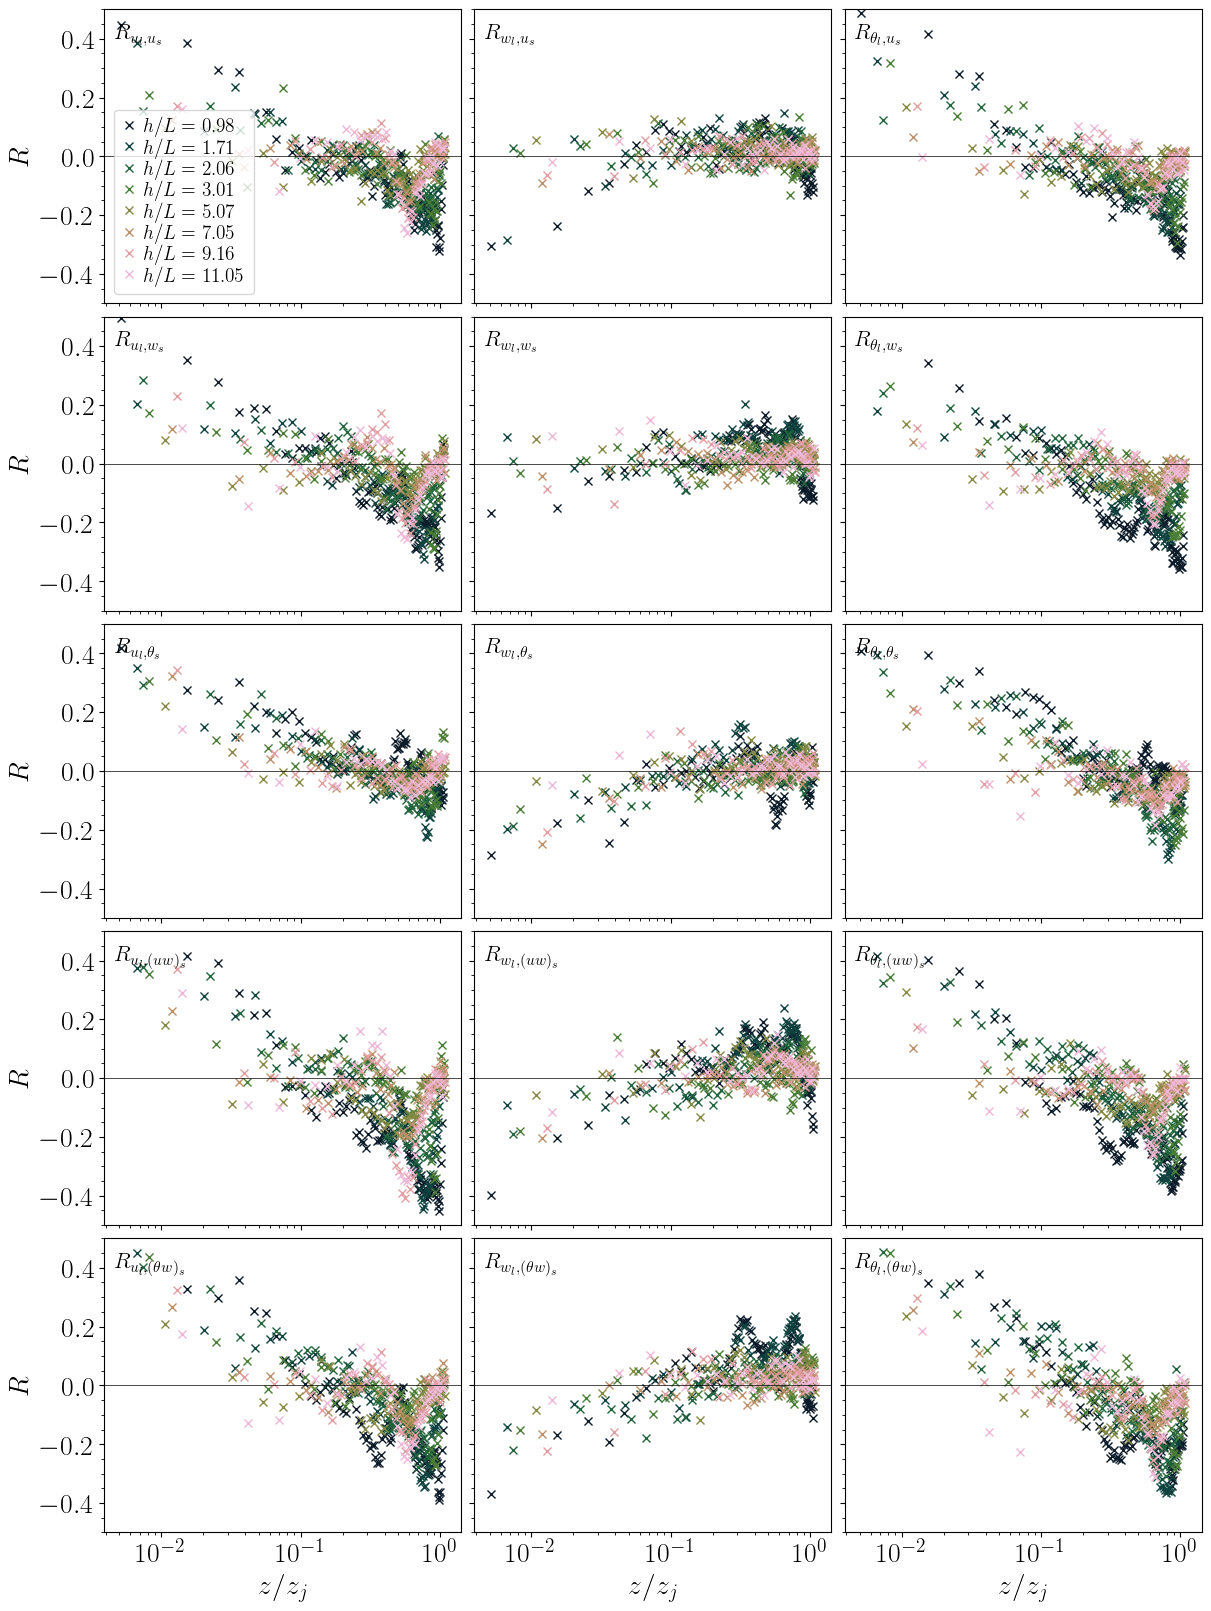

In [15]:
# scatter plot
fig1, ax1 = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True,
                         figsize=(12, 16), constrained_layout=True)
for isim, (R, stat) in enumerate(zip(Rall, sall)):
    print(f"Figure 1 - Sim {isim}")
    # grab indices for sbl
    isbl = np.arange(stat.nzsbl, dtype=np.int32)
    # figure 1 - fifteen panels - modulation by u_l and w_l and t_l
    # col 1 - modulation by u_l
    # col 2 - modulation by w_l
    # col 3 - modulation by t_l
    # row 1 - modulation of small-scale u by large-scale u&w&t
    # row 2 - modulation of small-scale w by large-scale u&w&t
    # row 3 - modulation of small-scale theta by large-scale u&w&t
    # row 4 - modulation of small-scale uw by large-scale u&w&t
    # row 5 - modulation of small-scale tw by large-scale u&w&t
    # (a) R_ul_Eu
    ax1[0,0].plot(stat.z[isbl]/stat.zj, R.ul_Eu[isbl], ls="", marker="x", c=cmap1[isim],
                    label=stat.label3)
    # (b) R_wl_Eu
    ax1[0,1].plot(stat.z[isbl]/stat.zj, R.wl_Eu[isbl], ls="", marker="x", c=cmap1[isim])
    # (c) R_tl_Eu
    ax1[0,2].plot(stat.z[isbl]/stat.zj, R.tl_Eu[isbl], ls="", marker="x", c=cmap1[isim])
    # (d) R_ul_Ew
    ax1[1,0].plot(stat.z[isbl]/stat.zj, R.ul_Ew[isbl], ls="", marker="x", c=cmap1[isim])
    # (e) R_wl_Ew
    ax1[1,1].plot(stat.z[isbl]/stat.zj, R.wl_Ew[isbl], ls="", marker="x", c=cmap1[isim])
    # (f) R_tl_Ew
    ax1[1,2].plot(stat.z[isbl]/stat.zj, R.tl_Ew[isbl], ls="", marker="x", c=cmap1[isim])
    # (g) R_ul_Et
    ax1[2,0].plot(stat.z[isbl]/stat.zj, R.ul_Et[isbl], ls="", marker="x", c=cmap1[isim])
    # (h) R_wl_Et
    ax1[2,1].plot(stat.z[isbl]/stat.zj, R.wl_Et[isbl], ls="", marker="x", c=cmap1[isim])
    # (i) R_tl_Et
    ax1[2,2].plot(stat.z[isbl]/stat.zj, R.tl_Et[isbl], ls="", marker="x", c=cmap1[isim])
    # (j) R_ul_Euw
    ax1[3,0].plot(stat.z[isbl]/stat.zj, R.ul_Euw[isbl], ls="", marker="x", c=cmap1[isim])
    # (k) R_wl_Euw
    ax1[3,1].plot(stat.z[isbl]/stat.zj, R.wl_Euw[isbl], ls="", marker="x", c=cmap1[isim])
    # (l) R_tl_Euw
    ax1[3,2].plot(stat.z[isbl]/stat.zj, R.tl_Euw[isbl], ls="", marker="x", c=cmap1[isim])
    # (m) R_ul_Etw
    ax1[4,0].plot(stat.z[isbl]/stat.zj, R.ul_Etw[isbl], ls="", marker="x", c=cmap1[isim])
    # (n) R_wl_Etw
    ax1[4,1].plot(stat.z[isbl]/stat.zj, R.wl_Etw[isbl], ls="", marker="x", c=cmap1[isim])
    # (o) R_wl_Etw
    ax1[4,2].plot(stat.z[isbl]/stat.zj, R.tl_Etw[isbl], ls="", marker="x", c=cmap1[isim])

# OUTSIDE LOOP
# clean up fig 1
ax1[4,0].set_xlabel("$z/z_j$")
# ax1[4,0].set_xlim([1e-2, 1e1])
ax1[0,0].set_ylim([-0.5, 0.5])
ax1[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax1[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
ax1[0,0].set_xscale("log")
ax1[4,1].set_xlabel("$z/z_j$")
ax1[4,2].set_xlabel("$z/z_j$")
ax1[0,0].legend(loc="lower left", labelspacing=0.10, 
                handletextpad=0.4, handlelength=0.75,
                fontsize=14)
# # plot ref lines
for iax in ax1.flatten():
    iax.axhline(0, c="k", ls="-", lw=0.5)
    # iax.axvline(0.5, c="k", ls="-", alpha=0.5)
# y-axis labels
for iax in ax1[:,0]:
    iax.set_ylabel("$R$")
# text labels
ax1[0,0].text(0.03, 0.90, "$R_{u_l,u_s}$", fontsize=16, transform=ax1[0,0].transAxes)
ax1[0,1].text(0.03, 0.90, "$R_{w_l,u_s}$", fontsize=16, transform=ax1[0,1].transAxes)
ax1[0,2].text(0.03, 0.90, "$R_{\\theta_l,u_s}$", fontsize=16, transform=ax1[0,2].transAxes)
ax1[1,0].text(0.03, 0.90, "$R_{u_l,w_s}$", fontsize=16, transform=ax1[1,0].transAxes)
ax1[1,1].text(0.03, 0.90, "$R_{w_l,w_s}$", fontsize=16, transform=ax1[1,1].transAxes)
ax1[1,2].text(0.03, 0.90, "$R_{\\theta_l,w_s}$", fontsize=16, transform=ax1[1,2].transAxes)
ax1[2,0].text(0.03, 0.90, "$R_{u_l,\\theta_s}$", fontsize=16, transform=ax1[2,0].transAxes)
ax1[2,1].text(0.03, 0.90, "$R_{w_l,\\theta_s}$", fontsize=16, transform=ax1[2,1].transAxes)
ax1[2,2].text(0.03, 0.90, "$R_{\\theta_l,\\theta_s}$", fontsize=16, transform=ax1[2,2].transAxes)
ax1[3,0].text(0.03, 0.90, "$R_{u_l,(uw)_s}$", fontsize=16, transform=ax1[3,0].transAxes)
ax1[3,1].text(0.03, 0.90, "$R_{w_l,(uw)_s}$", fontsize=16, transform=ax1[3,1].transAxes)
ax1[3,2].text(0.03, 0.90, "$R_{\\theta_l,(uw)_s}$", fontsize=16, transform=ax1[3,2].transAxes)
ax1[4,0].text(0.03, 0.90, "$R_{u_l,(\\theta w)_s}$", fontsize=16, transform=ax1[4,0].transAxes)
ax1[4,1].text(0.03, 0.90, "$R_{w_l,(\\theta w)_s}$", fontsize=16, transform=ax1[4,1].transAxes)
ax1[4,2].text(0.03, 0.90, "$R_{\\theta_l,(\\theta w)_s}$", fontsize=16, transform=ax1[4,2].transAxes)

# save
fsave1 = f"{figdir}all_amp_mod_scatter.pdf"
print(f"Saving figure {fsave1}")
# fig1.savefig(fsave1)
# plt.close(fig1)

### Integrate AM coefficients for sims 1--4

In [16]:
# create static list of keys
keys = []
for key in list(Rall[0].keys()):
    if "_int" not in key:
        keys.append(key)

# loop over sims
for ii, (R, s) in enumerate(zip(Rall[:4], sall[:4])):
    # grab indices for sbl
    isbl = np.arange(s.nzsbl, dtype=np.int32)
    # loop over all variables
    for key in keys:
        # integrate each with height and divide by SBL depth
        R[f"{key}_int"] = R[key][isbl].integrate("z") / s.z[isbl][-1]

Saving figure /home/bgreene/SBL_LES/figures/LSM/v3/amp_mod_integral.pdf


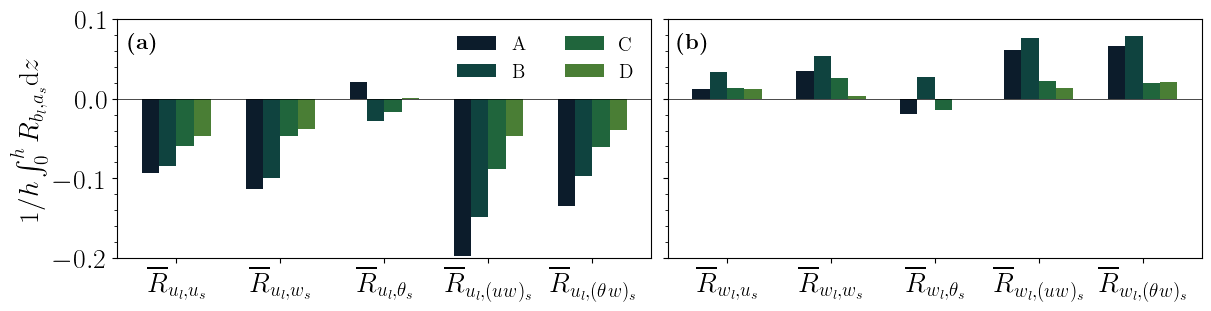

In [19]:
# plot subplots with bar plots
fig1, ax1 = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 3), constrained_layout=True)
# loop over sims
for ii, (R, s) in enumerate(zip(Rall[:4], sall[:4])):
    # u large
    ax1[0].bar(1+0.5*ii, R.ul_Eu_int, width=0.5, color=cmap1[ii], label=s.lab)
    ax1[0].bar(4+0.5*ii, R.ul_Ew_int, width=0.5, color=cmap1[ii])
    ax1[0].bar(7+0.5*ii, R.ul_Et_int, width=0.5, color=cmap1[ii])
    ax1[0].bar(10+0.5*ii, R.ul_Euw_int, width=0.5, color=cmap1[ii])  
    ax1[0].bar(13+0.5*ii, R.ul_Etw_int, width=0.5, color=cmap1[ii])
    # w large
    ax1[1].bar(1+0.5*ii, R.wl_Eu_int, width=0.5, color=cmap1[ii], label=s.lab)
    ax1[1].bar(4+0.5*ii, R.wl_Ew_int, width=0.5, color=cmap1[ii])
    ax1[1].bar(7+0.5*ii, R.wl_Et_int, width=0.5, color=cmap1[ii])
    ax1[1].bar(10+0.5*ii, R.wl_Euw_int, width=0.5, color=cmap1[ii])  
    ax1[1].bar(13+0.5*ii, R.wl_Etw_int, width=0.5, color=cmap1[ii])
    # theta large
    # ax1[1].bar(1+0.5*ii, R.tl_Eu_int, width=0.5, color=cmap1[ii], label=s.lab)
    # ax1[1].bar(4+0.5*ii, R.tl_Ew_int, width=0.5, color=cmap1[ii])
    # ax1[1].bar(7+0.5*ii, R.tl_Et_int, width=0.5, color=cmap1[ii])
    # ax1[1].bar(10+0.5*ii, R.tl_Euw_int, width=0.5, color=cmap1[ii])  
    # ax1[1].bar(13+0.5*ii, R.tl_Etw_int, width=0.5, color=cmap1[ii])

# tick labels
xplot = [j+(0.5*ii)/2 for j in np.arange(1,14,3)]
labelsu = ["$\\overline{R}_{u_l,u_s}$", "$\\overline{R}_{u_l,w_s}$", "$\\overline{R}_{u_l,\\theta_s}$", 
           "$\\overline{R}_{u_l,(uw)_s}$", "$\\overline{R}_{u_l,(\\theta w)_s}$"]
ax1[0].bar(xplot, 0, tick_label=labelsu)
labelsw = ["$\\overline{R}_{w_l,u_s}$", "$\\overline{R}_{w_l,w_s}$", "$\\overline{R}_{w_l,\\theta_s}$", 
           "$\\overline{R}_{w_l,(uw)_s}$", "$\\overline{R}_{w_l,(\\theta w)_s}$"]
ax1[1].bar(xplot, 0, tick_label=labelsw)
# labelst = ["$R_{\\theta_l,u_s}$", "$R_{\\theta_l,w_s}$", "$R_{\\theta_l,\\theta_s}$", "$R_{\\theta_l,(uw)_s}$", "$R_{\\theta_l,(\\theta w)_s}$"]
# ax1[1].bar(xplot, 0, tick_label=labelst)
# horizontal line on each subplot
for iax in ax1:
    iax.axhline(0, c="k", lw=0.5)
# axis limits
ax1[0].set_ylim([-0.2, 0.1])
# major and minor ticks
ax1[0].yaxis.set_major_locator(MultipleLocator(0.1))
ax1[0].yaxis.set_minor_locator(MultipleLocator(0.02))
# axis labels
ax1[0].set_ylabel("$1/h \\int_0^h R_{b_l,a_s} \\textnormal{d} z$")
# legend
ax1[0].legend(fontsize=14, frameon=False, ncol=2)
# subplot labels
for iax, lab in zip(ax1, list("ab")):
    iax.text(0.8, 0.07, f"$\\textbf{{({{{lab}}})}}$", fontsize=16, ha="center", va="center")
# save figure
fsave1 = f"{figdir}amp_mod_integral.pdf"
print(f"Saving figure {fsave1}")
# fig1.tight_layout()
fig1.savefig(fsave1, bbox_inches="tight")
# plt.close(fig1)

Figure 1 - Sim 0
Figure 1 - Sim 1
Figure 1 - Sim 2
Figure 1 - Sim 3
Figure 1 - Sim 4
Saving figure /home/bgreene/SBL_LES/figures/LSM/v2/all_amp_mod.pdf


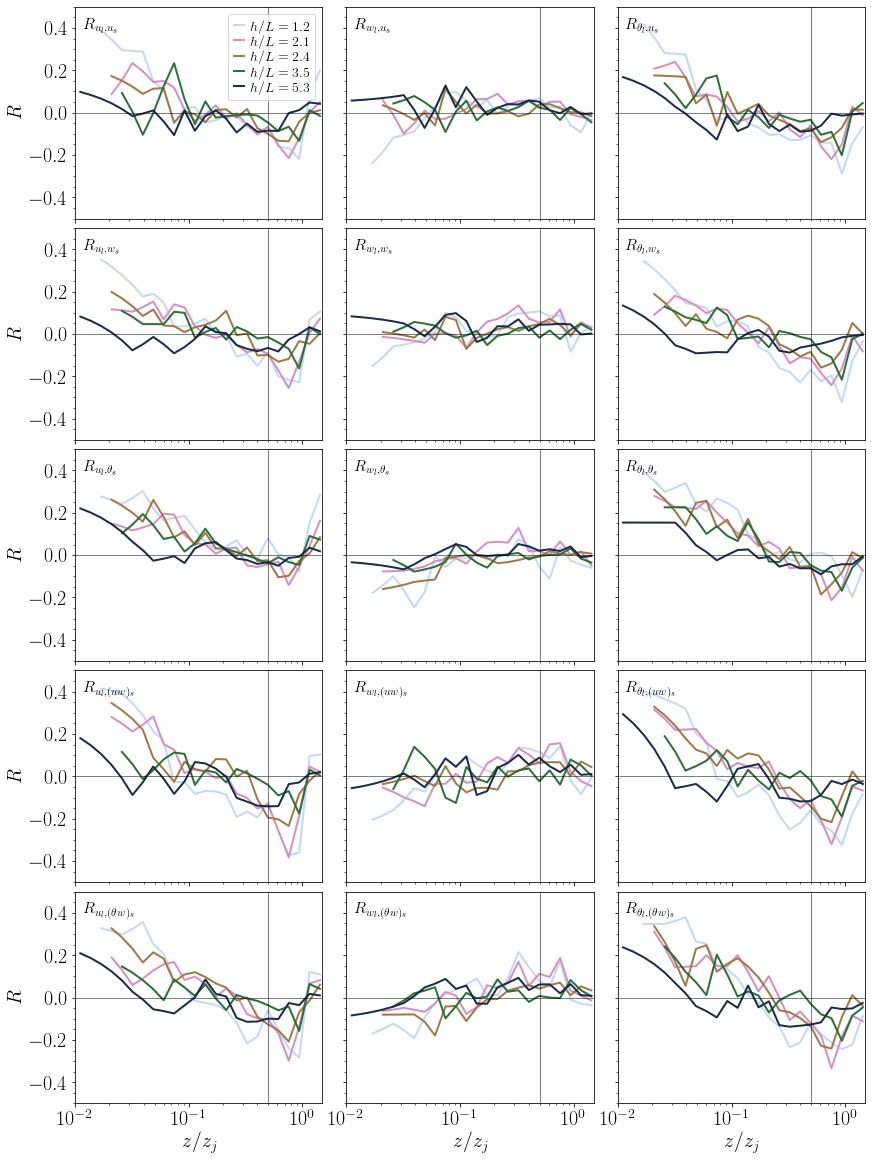

In [7]:
fig1, ax1 = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True,
                         figsize=(12, 16), constrained_layout=True)
for isim, (R, stat) in enumerate(zip(Rall, sall)):
    # add z/h as coordinate and swap with z
    # define array of z/h
    # NOTE: using z/zj now, kept variable names for ease
    zh = R.z / stat.zj
    # assign coupled with z
    R = R.assign_coords(zh=("z",zh.values))
    # swap
    R = R.swap_dims({"z": "zh"})
    # define new array of z/h logspace for bin averaging
    zhbin = np.logspace(-2, 0.2, 25)
    # from this, also need len(zhbin)-1 with midpoints of bins for plotting
    zhnew = [] # define empty array
    for iz in range(24):
        zhnew.append(gmean([zhbin[iz], zhbin[iz+1]]))
    zhnew = np.array(zhnew)
    # group by zh bins and calculate mean in one line
    Rbin = R.groupby_bins("zh", zhbin).mean("zh", skipna=True)
    # create new coordinate "zh_bins", then swap and drop
    Rbin = Rbin.assign_coords({"zh": ("zh_bins", zhnew)}).swap_dims({"zh_bins": "zh"})
    # interpolate empty values for better plotting
    Rbin = Rbin.interpolate_na(dim="zh")
    # calculate h/L parameter for plotting
    hL = (stat.he/stat.L).values
    # Plot ------------------------------------------------
    print(f"Figure 1 - Sim {isim}")
    # figure 1 - fifteen panels - modulation by u_l and w_l and t_l
    # col 1 - modulation by u_l
    # col 2 - modulation by w_l
    # col 3 - modulation by t_l
    # row 1 - modulation of small-scale u by large-scale u&w&t
    # row 2 - modulation of small-scale w by large-scale u&w&t
    # row 3 - modulation of small-scale theta by large-scale u&w&t
    # row 4 - modulation of small-scale uw by large-scale u&w&t
    # row 5 - modulation of small-scale tw by large-scale u&w&t
    # (a) R_ul_Eu
    ax1[0,0].plot(Rbin.zh, Rbin.ul_Eu, ls="-", c=cmap1[isim], lw=2,
                    label=f"$h/L={{{hL:3.1f}}}$")
    # (b) R_wl_Eu
    ax1[0,1].plot(Rbin.zh, Rbin.wl_Eu, ls="-", c=cmap1[isim], lw=2)
    # (c) R_tl_Eu
    ax1[0,2].plot(Rbin.zh, Rbin.tl_Eu, ls="-", c=cmap1[isim], lw=2)
    # (d) R_ul_Ew
    ax1[1,0].plot(Rbin.zh, Rbin.ul_Ew, ls="-", c=cmap1[isim], lw=2)
    # (e) R_wl_Ew
    ax1[1,1].plot(Rbin.zh, Rbin.wl_Ew, ls="-", c=cmap1[isim], lw=2)
    # (f) R_tl_Ew
    ax1[1,2].plot(Rbin.zh, Rbin.tl_Ew, ls="-", c=cmap1[isim], lw=2)
    # (g) R_ul_Et
    ax1[2,0].plot(Rbin.zh, Rbin.ul_Et, ls="-", c=cmap1[isim], lw=2)
    # (h) R_wl_Et
    ax1[2,1].plot(Rbin.zh, Rbin.wl_Et, ls="-", c=cmap1[isim], lw=2)
    # (i) R_tl_Et
    ax1[2,2].plot(Rbin.zh, Rbin.tl_Et, ls="-", c=cmap1[isim], lw=2)
    # (j) R_ul_Euw
    ax1[3,0].plot(Rbin.zh, Rbin.ul_Euw, ls="-", c=cmap1[isim], lw=2)
    # (k) R_wl_Euw
    ax1[3,1].plot(Rbin.zh, Rbin.wl_Euw, ls="-", c=cmap1[isim], lw=2)
    # (l) R_tl_Euw
    ax1[3,2].plot(Rbin.zh, Rbin.tl_Euw, ls="-", c=cmap1[isim], lw=2)
    # (m) R_ul_Etw
    ax1[4,0].plot(Rbin.zh, Rbin.ul_Etw, ls="-", c=cmap1[isim], lw=2)
    # (n) R_wl_Etw
    ax1[4,1].plot(Rbin.zh, Rbin.wl_Etw, ls="-", c=cmap1[isim], lw=2)
    # (o) R_wl_Etw
    ax1[4,2].plot(Rbin.zh, Rbin.tl_Etw, ls="-", c=cmap1[isim], lw=2)

# OUTSIDE LOOP
# clean up fig 1
ax1[4,0].set_xlabel("$z/z_j$")
ax1[4,0].set_xlim([1e-2, 1.5e0])
ax1[0,0].set_ylim([-0.5, 0.5])
ax1[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax1[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
ax1[0,0].set_xscale("log")
ax1[4,1].set_xlabel("$z/z_j$")
ax1[4,2].set_xlabel("$z/z_j$")
ax1[0,0].legend(loc="upper right", labelspacing=0.10, 
                handletextpad=0.4, handlelength=0.75,
                fontsize=14)
# plot ref lines
for iax in ax1.flatten():
    iax.axhline(0, c="k", ls="-", lw=0.5)
    iax.axvline(0.5, c="k", ls="-", lw=0.5)
# y-axis labels
for iax in ax1[:,0]:
    iax.set_ylabel("$R$")
# text labels
ax1[0,0].text(0.03, 0.90, "$R_{u_l,u_s}$", fontsize=16, transform=ax1[0,0].transAxes)
ax1[0,1].text(0.03, 0.90, "$R_{w_l,u_s}$", fontsize=16, transform=ax1[0,1].transAxes)
ax1[0,2].text(0.03, 0.90, "$R_{\\theta_l,u_s}$", fontsize=16, transform=ax1[0,2].transAxes)
ax1[1,0].text(0.03, 0.90, "$R_{u_l,w_s}$", fontsize=16, transform=ax1[1,0].transAxes)
ax1[1,1].text(0.03, 0.90, "$R_{w_l,w_s}$", fontsize=16, transform=ax1[1,1].transAxes)
ax1[1,2].text(0.03, 0.90, "$R_{\\theta_l,w_s}$", fontsize=16, transform=ax1[1,2].transAxes)
ax1[2,0].text(0.03, 0.90, "$R_{u_l,\\theta_s}$", fontsize=16, transform=ax1[2,0].transAxes)
ax1[2,1].text(0.03, 0.90, "$R_{w_l,\\theta_s}$", fontsize=16, transform=ax1[2,1].transAxes)
ax1[2,2].text(0.03, 0.90, "$R_{\\theta_l,\\theta_s}$", fontsize=16, transform=ax1[2,2].transAxes)
ax1[3,0].text(0.03, 0.90, "$R_{u_l,(uw)_s}$", fontsize=16, transform=ax1[3,0].transAxes)
ax1[3,1].text(0.03, 0.90, "$R_{w_l,(uw)_s}$", fontsize=16, transform=ax1[3,1].transAxes)
ax1[3,2].text(0.03, 0.90, "$R_{\\theta_l,(uw)_s}$", fontsize=16, transform=ax1[3,2].transAxes)
ax1[4,0].text(0.03, 0.90, "$R_{u_l,(\\theta w)_s}$", fontsize=16, transform=ax1[4,0].transAxes)
ax1[4,1].text(0.03, 0.90, "$R_{w_l,(\\theta w)_s}$", fontsize=16, transform=ax1[4,1].transAxes)
ax1[4,2].text(0.03, 0.90, "$R_{\\theta_l,(\\theta w)_s}$", fontsize=16, transform=ax1[4,2].transAxes)

# save
fsave1 = f"{figdir}all_amp_mod.pdf"
print(f"Saving figure {fsave1}")
# fig1.savefig(fsave1)
# plt.close(fig1)

### Same as above but bin by constant # of points instead of exact bin limits

Saving figure /home/bgreene/SBL_LES/figures/LSM/v3/all_amp_mod_bin.pdf


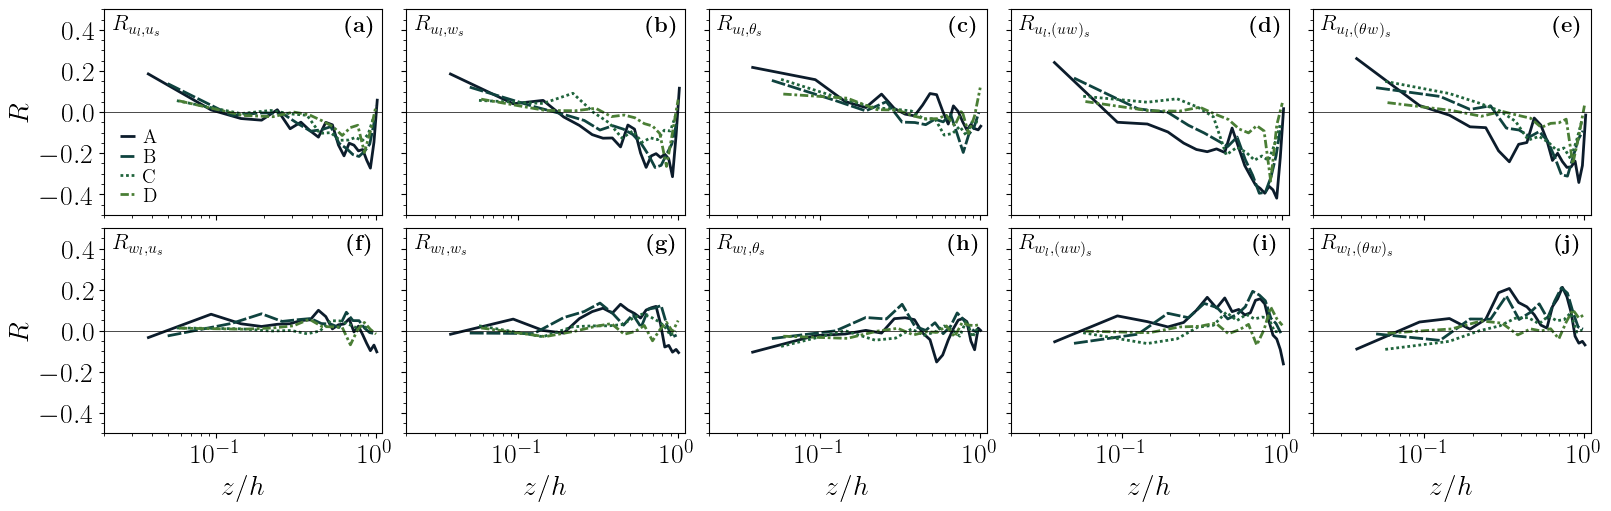

In [22]:
fig1, ax1 = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,
                         figsize=(16, 5), constrained_layout=True)
for isim, (R, stat) in enumerate(zip(Rall[:4], sall[:4])):
    # grab indices for sbl
    isbl = np.arange(stat.nzsbl, dtype=np.int32)
    # add z/h as coordinate and swap with z
    # define array of z/h
    # NOTE: using z/zj now, kept variable names for ease
    zh = R.z / stat.h
    # assign coupled with z
    R = R.assign_coords(zh=("z",zh.values))
    # swap
    R = R.swap_dims({"z": "zh"})
    # define number of points per bin
    Nperbin = 5
    # calculate total number of bins based on number of points
    Nbin = int(np.ceil(len(zh)/Nperbin))
    # define new zh bins based on averages of zh
    zhbin = []
    # loop through zh
    for jbin in range(Nbin):
        # define incrementing indices
        ilo = jbin * Nperbin
        ihi = ilo + Nperbin
        # check to see if ihi will be out of range
        if ihi >= len(zh):
            ihi = -1
        # grab zh data
        zhbin.append(gmean(zh[ilo:ihi]))
    # convert to numpy array
    zhbin = np.array(zhbin)
    # from this, also need len(zhbin)-1 with midpoints of bins for plotting
    zhnew = [] # define empty array
    for iz in range(Nbin-1):
        zhnew.append(gmean([zhbin[iz], zhbin[iz+1]]))
    zhnew = np.array(zhnew)
    # group by zh bins and calculate mean in one line
    Rbin = R.groupby_bins("zh", zhbin).mean("zh", skipna=True)
    # create new coordinate "zh_bins", then swap and drop
    Rbin = Rbin.assign_coords({"zh": ("zh_bins", zhnew)}).swap_dims({"zh_bins": "zh"})
    # interpolate empty values for better plotting
    Rbin = Rbin.interpolate_na(dim="zh")
    # calculate indeces of points where z/zj <= h/zj
    isblbin = np.where(zhnew <= (stat.h/stat.zj).values)[0]
    # Plot ------------------------------------------------
    # figure 1 - fifteen panels - modulation by u_l and w_l and t_l
    # row 1 - modulation by u_l
    # row 2 - modulation by t_l
    # col 1 - modulation of small-scale u by large-scale u&w&t
    # col 2 - modulation of small-scale w by large-scale u&w&t
    # col 3 - modulation of small-scale theta by large-scale u&w&t
    # col 4 - modulation of small-scale uw by large-scale u&w&t
    # col 5 - modulation of small-scale tw by large-scale u&w&t
    # (a) R_ul_Eu
    ax1[0,0].plot(Rbin.zh[isblbin], Rbin.ul_Eu[isblbin], ls=dash[isim], c=cmap1[isim], lw=2,
                    label=stat.lab)
    # (b) R_tl_Eu
    ax1[1,0].plot(Rbin.zh[isblbin], Rbin.wl_Eu[isblbin], ls=dash[isim], c=cmap1[isim], lw=2)
    # (c) R_ul_Ew
    ax1[0,1].plot(Rbin.zh[isblbin], Rbin.ul_Ew[isblbin], ls=dash[isim], c=cmap1[isim], lw=2)
    # (d) R_tl_Ew
    ax1[1,1].plot(Rbin.zh[isblbin], Rbin.wl_Ew[isblbin], ls=dash[isim], c=cmap1[isim], lw=2)
    # (e) R_ul_Et
    ax1[0,2].plot(Rbin.zh[isblbin], Rbin.ul_Et[isblbin], ls=dash[isim], c=cmap1[isim], lw=2)
    # (f) R_tl_Et
    ax1[1,2].plot(Rbin.zh[isblbin], Rbin.wl_Et[isblbin], ls=dash[isim], c=cmap1[isim], lw=2)
    # (g) R_ul_Euw
    ax1[0,3].plot(Rbin.zh[isblbin], Rbin.ul_Euw[isblbin], ls=dash[isim], c=cmap1[isim], lw=2)
    # (h) R_tl_Euw
    ax1[1,3].plot(Rbin.zh[isblbin], Rbin.wl_Euw[isblbin], ls=dash[isim], c=cmap1[isim], lw=2)
    # (i) R_ul_Etw
    ax1[0,4].plot(Rbin.zh[isblbin], Rbin.ul_Etw[isblbin], ls=dash[isim], c=cmap1[isim], lw=2)
    # (j) R_tl_Etw
    ax1[1,4].plot(Rbin.zh[isblbin], Rbin.wl_Etw[isblbin], ls=dash[isim], c=cmap1[isim], lw=2)

# OUTSIDE LOOP
# axis labels
for iax in ax1[1,:]:
    iax.set_xlabel("$z/h$")
for iax in ax1[:,0]:
    iax.set_ylabel("$R$")
# axis limits
ax1[0,0].set_xlim([2e-2, 1.1e0])
ax1[0,0].set_ylim([-0.5, 0.5])
# major and minor ticks
ax1[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax1[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
# axis scale
ax1[0,0].set_xscale("log")
# legend
ax1[0,0].legend(loc=(0.03, 0.01), labelspacing=0.10, 
                handletextpad=0.4, handlelength=0.75,
                fontsize=14, frameon=False)
# plot ref lines
for iax in ax1.flatten():
    iax.axhline(0, c="k", ls="-", lw=0.5)
    # iax.axvline(0.5, c="k", ls="-", lw=0.5)
# text labels
ax1[0,0].text(0.03, 0.90, "$R_{u_l,u_s}$", fontsize=16, transform=ax1[0,0].transAxes)
ax1[1,0].text(0.03, 0.90, "$R_{w_l,u_s}$", fontsize=16, transform=ax1[1,0].transAxes)
ax1[0,1].text(0.03, 0.90, "$R_{u_l,w_s}$", fontsize=16, transform=ax1[0,1].transAxes)
ax1[1,1].text(0.03, 0.90, "$R_{w_l,w_s}$", fontsize=16, transform=ax1[1,1].transAxes)
ax1[0,2].text(0.03, 0.90, "$R_{u_l,\\theta_s}$", fontsize=16, transform=ax1[0,2].transAxes)
ax1[1,2].text(0.03, 0.90, "$R_{w_l,\\theta_s}$", fontsize=16, transform=ax1[1,2].transAxes)
ax1[0,3].text(0.03, 0.90, "$R_{u_l,(uw)_s}$", fontsize=16, transform=ax1[0,3].transAxes)
ax1[1,3].text(0.03, 0.90, "$R_{w_l,(uw)_s}$", fontsize=16, transform=ax1[1,3].transAxes)
ax1[0,4].text(0.03, 0.90, "$R_{u_l,(\\theta w)_s}$", fontsize=16, transform=ax1[0,4].transAxes)
ax1[1,4].text(0.03, 0.90, "$R_{w_l,(\\theta w)_s}$", fontsize=16, transform=ax1[1,4].transAxes)
# subplot labels
for iax, lab in zip(ax1.flatten(), list("abcdefghij")):
    iax.text(0.8, 0.42, f"$\\textbf{{({{{lab}}})}}$", fontsize=16, ha="center", va="center")

# save
fsave1 = f"{figdir}all_amp_mod_bin.pdf"
print(f"Saving figure {fsave1}")
fig1.savefig(fsave1)

### Do the same for $Ri_g$ with constant number per bin

In [11]:
# create dictionary of empty lists for each key in Rall
Rd = {}
for key in Rall[0].variables.keys():
    if ((key != "z") & ("_int" not in key)):
        Rd[key] = []
# create empty list for all values of Ri
Riall = []
# loop over simulations and fill Rd
for R, s in zip(Rall[:4], sall[:4]):
    # grab Ri values from s (only within sbl)
    isbl = np.arange(s.nzsbl, dtype=np.int32)
    Riall += list(s.Rig[isbl].values)
    # loop over variables and store in long list in Rd
    for key in Rd.keys():
        Rd[key] += list(R[key][isbl].values)
# initialize new dictionary for sorted arrays
Rdsort = {}
# sort based on Ri
isort = np.argsort(Riall)
Risort = np.array(Riall)[isort]
# loop over variables in Rd, sort, and store in Rdsort
for key in Rd.keys():
    Rdsort[key] = np.array(Rd[key])[isort]
# define number of points per bin: start with 10
nperbin = 5
# initialize empty Riplot, Rplot for storing averages
Riplot = []
Rplot = {}
# create empty lists for each variable in Rplot
for key in Rd.keys():
    # mean
    Rplot[f"{key}_mean"] = []
    # median
    Rplot[f"{key}_med"] = []
    # std
    Rplot[f"{key}_std"] = []
# loop over increments of nperbin and calculate mean, median, std
for ibin in range(len(Risort)//nperbin):
    # define incrementing indices
    ilo = ibin * nperbin
    ihi = ilo + nperbin
    # check to see if ihi will be out of range
    if ihi >= len(Risort)//nperbin:
        ihi = -1
    # calculate means from ilo to ihi
    Riplot.append(gmean(Risort[ilo:ihi]))
    # loop over variables
    for key in Rd.keys():
        # mean
        Rplot[f"{key}_mean"].append(np.mean(Rdsort[key][ilo:ihi]))
        # median
        Rplot[f"{key}_med"].append(np.median(Rdsort[key][ilo:ihi]))
        # std
        Rplot[f"{key}_std"].append(np.std(Rdsort[key][ilo:ihi]))
# finally, loop over everything in Rplot and turn into numpy arrays
for key in Rplot.keys():
    Rplot[key] = np.array(Rplot[key])

Saving figure /home/bgreene/SBL_LES/figures/LSM/v2/all_amp_mod_Rig_bin.eps


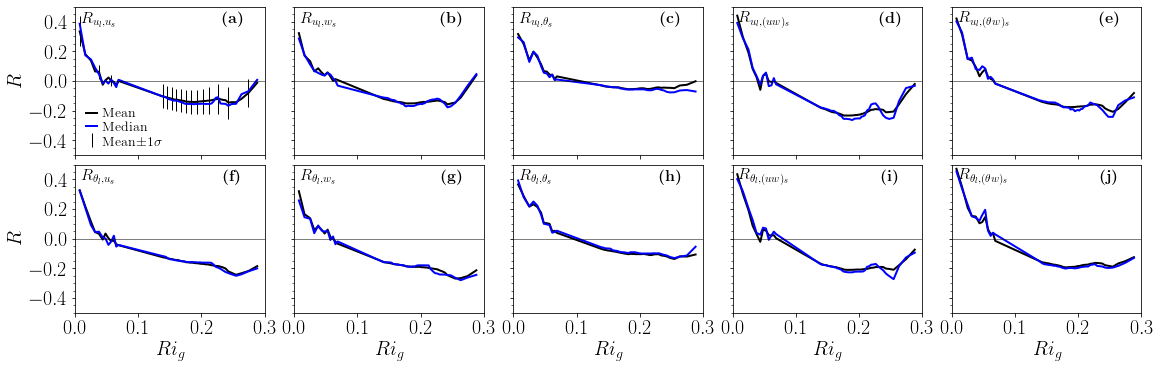

In [5]:
fig1, ax1 = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,
                         figsize=(16, 5), constrained_layout=True)
# figure 1 - ten panels - modulation by u_l and t_l
# row 1 - modulation by u_l
# row 2 - modulation by t_l
# col 1 - modulation of small-scale u by large-scale u&w&t
# col 2 - modulation of small-scale w by large-scale u&w&t
# col 3 - modulation of small-scale theta by large-scale u&w&t
# col 4 - modulation of small-scale uw by large-scale u&w&t
# col 5 - modulation of small-scale tw by large-scale u&w&t
# (a) R_ul_Eu
ax1[0,0].plot(Riplot, Rplot["ul_Eu_mean"], ls="-", c="k", lw=2, label="Mean")
ax1[0,0].plot(Riplot, Rplot["ul_Eu_med"], ls="-", c="b", lw=2, label="Median")
ax1[0,0].errorbar(Riplot[::4], Rplot["ul_Eu_mean"][::4], yerr=Rplot["ul_Eu_std"][::4],
                  ls="", c="k", lw=1, label="Mean$\\pm 1 \\sigma$")
# ax1[0,0].fill_between(Riplot, Rplot["ul_Eu_mean"]-Rplot["ul_Eu_std"],
#                               Rplot["ul_Eu_mean"]+Rplot["ul_Eu_std"],
#                               alpha=0.3, color="k", label="Mean$\\pm 1 \\sigma$")
# (b) R_tl_Eu
ax1[1,0].plot(Riplot, Rplot["tl_Eu_mean"], ls="-", c="k", lw=2, label="Mean")
ax1[1,0].plot(Riplot, Rplot["tl_Eu_med"], ls="-", c="b", lw=2, label="Median")
# ax1[1,0].fill_between(Riplot, Rplot["tl_Eu_mean"]-Rplot["tl_Eu_std"],
#                               Rplot["tl_Eu_mean"]+Rplot["tl_Eu_std"],
#                               alpha=0.3, color="k", label="Mean$\\pm 1 \\sigma$")
# (c) R_ul_Ew
ax1[0,1].plot(Riplot, Rplot["ul_Ew_mean"], ls="-", c="k", lw=2, label="Mean")
ax1[0,1].plot(Riplot, Rplot["ul_Ew_med"], ls="-", c="b", lw=2, label="Median")
# ax1[0,1].fill_between(Riplot, Rplot["ul_Ew_mean"]-Rplot["ul_Ew_std"],
#                               Rplot["ul_Ew_mean"]+Rplot["ul_Ew_std"],
#                               alpha=0.3, color="k", label="Mean$\\pm 1 \\sigma$")
# (d) R_tl_Ew
ax1[1,1].plot(Riplot, Rplot["tl_Ew_mean"], ls="-", c="k", lw=2, label="Mean")
ax1[1,1].plot(Riplot, Rplot["tl_Ew_med"], ls="-", c="b", lw=2, label="Median")
# ax1[1,1].fill_between(Riplot, Rplot["tl_Ew_mean"]-Rplot["tl_Ew_std"],
#                               Rplot["tl_Ew_mean"]+Rplot["tl_Ew_std"],
#                               alpha=0.3, color="k", label="Mean$\\pm 1 \\sigma$")
# (e) R_ul_Et
ax1[0,2].plot(Riplot, Rplot["ul_Et_mean"], ls="-", c="k", lw=2, label="Mean")
ax1[0,2].plot(Riplot, Rplot["ul_Et_med"], ls="-", c="b", lw=2, label="Median")
# ax1[0,2].fill_between(Riplot, Rplot["ul_Et_mean"]-Rplot["ul_Et_std"],
#                               Rplot["ul_Et_mean"]+Rplot["ul_Et_std"],
#                               alpha=0.3, color="k", label="Mean$\\pm 1 \\sigma$")
# (f) R_tl_Et
ax1[1,2].plot(Riplot, Rplot["tl_Et_mean"], ls="-", c="k", lw=2, label="Mean")
ax1[1,2].plot(Riplot, Rplot["tl_Et_med"], ls="-", c="b", lw=2, label="Median")
# ax1[1,2].fill_between(Riplot, Rplot["tl_Et_mean"]-Rplot["tl_Et_std"],
#                               Rplot["tl_Et_mean"]+Rplot["tl_Et_std"],
#                               alpha=0.3, color="k", label="Mean$\\pm 1 \\sigma$")
# (g) R_ul_Euw
ax1[0,3].plot(Riplot, Rplot["ul_Euw_mean"], ls="-", c="k", lw=2, label="Mean")
ax1[0,3].plot(Riplot, Rplot["ul_Euw_med"], ls="-", c="b", lw=2, label="Median")
# ax1[0,3].fill_between(Riplot, Rplot["ul_Euw_mean"]-Rplot["ul_Euw_std"],
#                               Rplot["ul_Euw_mean"]+Rplot["ul_Euw_std"],
#                               alpha=0.3, color="k", label="Mean$\\pm 1 \\sigma$")
# (h) R_tl_Euw
ax1[1,3].plot(Riplot, Rplot["tl_Euw_mean"], ls="-", c="k", lw=2, label="Mean")
ax1[1,3].plot(Riplot, Rplot["tl_Euw_med"], ls="-", c="b", lw=2, label="Median")
# ax1[1,3].fill_between(Riplot, Rplot["tl_Euw_mean"]-Rplot["tl_Euw_std"],
#                               Rplot["tl_Euw_mean"]+Rplot["tl_Euw_std"],
#                               alpha=0.3, color="k", label="Mean$\\pm 1 \\sigma$")
# (i) R_ul_Etw
ax1[0,4].plot(Riplot, Rplot["ul_Etw_mean"], ls="-", c="k", lw=2, label="Mean")
ax1[0,4].plot(Riplot, Rplot["ul_Etw_med"], ls="-", c="b", lw=2, label="Median")
# ax1[0,4].fill_between(Riplot, Rplot["ul_Etw_mean"]-Rplot["ul_Etw_std"],
#                               Rplot["ul_Etw_mean"]+Rplot["ul_Etw_std"],
#                               alpha=0.3, color="k", label="Mean$\\pm 1 \\sigma$")
# (j) R_tl_Etw
ax1[1,4].plot(Riplot, Rplot["tl_Etw_mean"], ls="-", c="k", lw=2, label="Mean")
ax1[1,4].plot(Riplot, Rplot["tl_Etw_med"], ls="-", c="b", lw=2, label="Median")
# ax1[1,4].fill_between(Riplot, Rplot["tl_Etw_mean"]-Rplot["tl_Etw_std"],
#                               Rplot["tl_Etw_mean"]+Rplot["tl_Etw_std"],
#                               alpha=0.3, color="k", label="Mean$\\pm 1 \\sigma$")

# axis labels
for iax in ax1[1,:]:
    iax.set_xlabel("$Ri_g$")
for iax in ax1[:,0]:
    iax.set_ylabel("$R$")
# axis limits
# ax1[0,0].set_xlim([1e-2, 3e-1])
ax1[0,0].set_xlim([0, 0.3])
ax1[0,0].set_ylim([-0.5, 0.5])
# major and minor ticks
ax1[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax1[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
# axis scale
# ax1[0,0].set_xscale("log")
# legend
ax1[0,0].legend(loc=(0.03, 0.01), labelspacing=0.10, 
                handletextpad=0.4, handlelength=0.75,
                fontsize=14, frameon=False)
# plot ref lines
for iax in ax1.flatten():
    iax.axhline(0, c="k", ls="-", lw=0.5)
    # iax.axvline(0.5, c="k", ls="-", lw=0.5)
# text labels
ax1[0,0].text(0.03, 0.90, "$R_{u_l,u_s}$", fontsize=16, transform=ax1[0,0].transAxes)
ax1[1,0].text(0.03, 0.90, "$R_{\\theta_l,u_s}$", fontsize=16, transform=ax1[1,0].transAxes)
ax1[0,1].text(0.03, 0.90, "$R_{u_l,w_s}$", fontsize=16, transform=ax1[0,1].transAxes)
ax1[1,1].text(0.03, 0.90, "$R_{\\theta_l,w_s}$", fontsize=16, transform=ax1[1,1].transAxes)
ax1[0,2].text(0.03, 0.90, "$R_{u_l,\\theta_s}$", fontsize=16, transform=ax1[0,2].transAxes)
ax1[1,2].text(0.03, 0.90, "$R_{\\theta_l,\\theta_s}$", fontsize=16, transform=ax1[1,2].transAxes)
ax1[0,3].text(0.03, 0.90, "$R_{u_l,(uw)_s}$", fontsize=16, transform=ax1[0,3].transAxes)
ax1[1,3].text(0.03, 0.90, "$R_{\\theta_l,(uw)_s}$", fontsize=16, transform=ax1[1,3].transAxes)
ax1[0,4].text(0.03, 0.90, "$R_{u_l,(\\theta w)_s}$", fontsize=16, transform=ax1[0,4].transAxes)
ax1[1,4].text(0.03, 0.90, "$R_{\\theta_l,(\\theta w)_s}$", fontsize=16, transform=ax1[1,4].transAxes)
# subplot labels
for iax, lab in zip(ax1.flatten(), list("abcdefghij")):
    iax.text(0.25, 0.42, f"$\\textbf{{({{{lab}}})}}$", fontsize=16, ha="center", va="center")

# save
fsave1 = f"{figdir}all_amp_mod_Rig_bin.eps"
print(f"Saving figure {fsave1}")
# fig1.savefig(fsave1)

In [30]:
Riplot

[0.010833669021744369,
 0.028162159110383077,
 0.04065144078433804,
 0.12618773640810343,
 0.1305537621892683,
 0.1345842617683165,
 0.13840076585972239,
 0.14207784221397723,
 0.14567917951348544,
 0.14919278449768006,
 0.15267128455925005,
 0.1561427144758522,
 0.15963550957369588,
 0.16324112627898907,
 0.16702774600639908,
 0.17094321173850446,
 0.1749612058044365,
 0.17909957582338612,
 0.18343418217420382,
 0.1879893216669107,
 0.19252352969121955,
 0.19706043543355684,
 0.20171206747076775,
 0.20680759162446982,
 0.21263501671911714,
 0.21920977673858497,
 0.22634785177470956,
 0.23407680213662785,
 0.24258318084496777,
 0.254824006935995,
 0.2744180612336272]

### Now try plotting versus $Ri_g$

Figure 1 - Sim 0
Figure 1 - Sim 1
Figure 1 - Sim 2
Figure 1 - Sim 3
Figure 1 - Sim 4
Figure 1 - Sim 5
Figure 1 - Sim 6
Figure 1 - Sim 7
Saving figure /home/bgreene/SBL_LES/figures/LSM/v2/amp_mod_all_vs_Ri_scatter.pdf


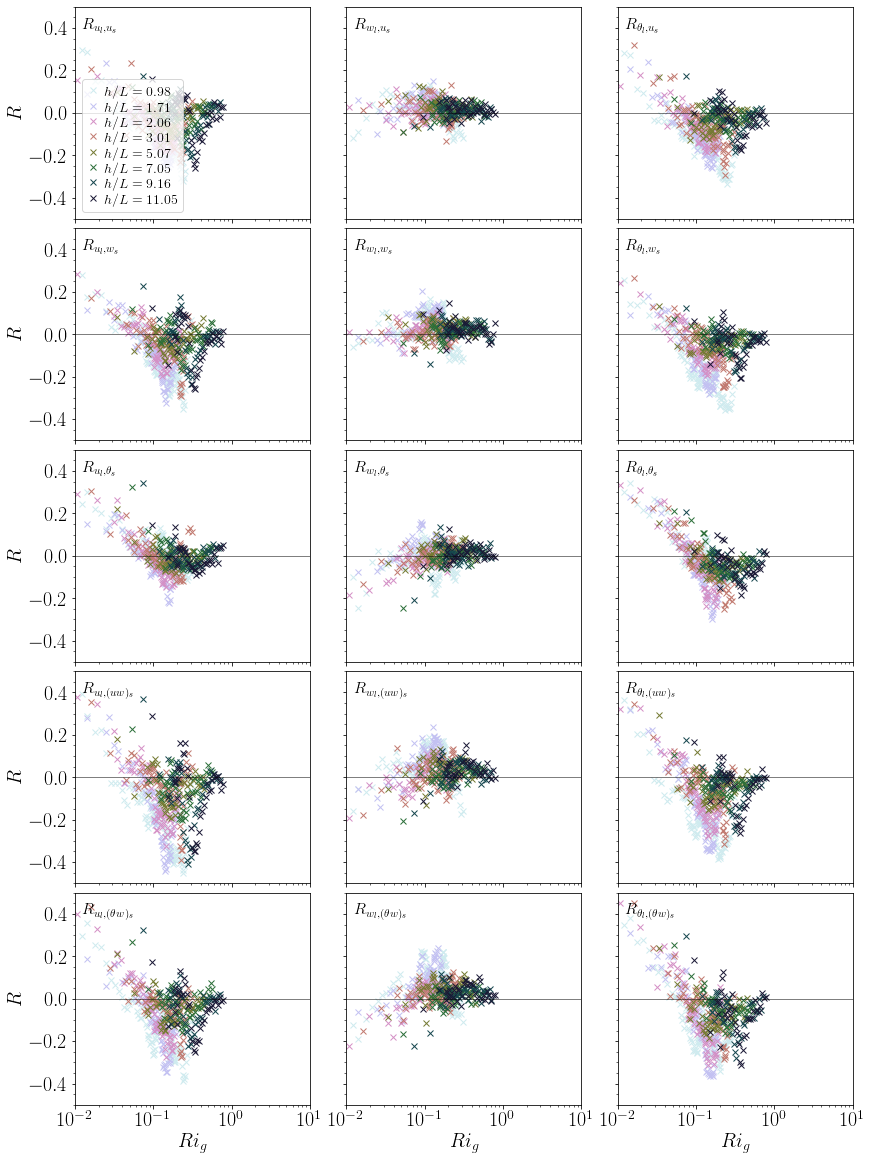

In [6]:
# scatter plot
fig2, ax2 = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True,
                         figsize=(12, 16), constrained_layout=True)
for isim, (R, stat) in enumerate(zip(Rall, sall)):
    print(f"Figure 1 - Sim {isim}")
    # grab indices for sbl
    isbl = np.arange(stat.nzsbl, dtype=np.int32)
    # figure 1 - fifteen panels - modulation by u_l and w_l and t_l
    # col 1 - modulation by u_l
    # col 2 - modulation by w_l
    # col 3 - modulation by t_l
    # row 1 - modulation of small-scale u by large-scale u&w&t
    # row 2 - modulation of small-scale w by large-scale u&w&t
    # row 3 - modulation of small-scale theta by large-scale u&w&t
    # row 4 - modulation of small-scale uw by large-scale u&w&t
    # row 5 - modulation of small-scale tw by large-scale u&w&t
    # (a) R_ul_Eu
    ax2[0,0].plot(stat.Rig[isbl], R.ul_Eu[isbl], ls="", marker="x", c=cmap1[isim],
                    label=stat.label3)
    # (b) R_wl_Eu
    ax2[0,1].plot(stat.Rig[isbl], R.wl_Eu[isbl], ls="", marker="x", c=cmap1[isim])
    # (c) R_tl_Eu
    ax2[0,2].plot(stat.Rig[isbl], R.tl_Eu[isbl], ls="", marker="x", c=cmap1[isim])
    # (d) R_ul_Ew
    ax2[1,0].plot(stat.Rig[isbl], R.ul_Ew[isbl], ls="", marker="x", c=cmap1[isim])
    # (e) R_wl_Ew
    ax2[1,1].plot(stat.Rig[isbl], R.wl_Ew[isbl], ls="", marker="x", c=cmap1[isim])
    # (f) R_tl_Ew
    ax2[1,2].plot(stat.Rig[isbl], R.tl_Ew[isbl], ls="", marker="x", c=cmap1[isim])
    # (g) R_ul_Et
    ax2[2,0].plot(stat.Rig[isbl], R.ul_Et[isbl], ls="", marker="x", c=cmap1[isim])
    # (h) R_wl_Et
    ax2[2,1].plot(stat.Rig[isbl], R.wl_Et[isbl], ls="", marker="x", c=cmap1[isim])
    # (i) R_tl_Et
    ax2[2,2].plot(stat.Rig[isbl], R.tl_Et[isbl], ls="", marker="x", c=cmap1[isim])
    # (j) R_ul_Euw
    ax2[3,0].plot(stat.Rig[isbl], R.ul_Euw[isbl], ls="", marker="x", c=cmap1[isim])
    # (k) R_wl_Euw
    ax2[3,1].plot(stat.Rig[isbl], R.wl_Euw[isbl], ls="", marker="x", c=cmap1[isim])
    # (l) R_tl_Euw
    ax2[3,2].plot(stat.Rig[isbl], R.tl_Euw[isbl], ls="", marker="x", c=cmap1[isim])
    # (m) R_ul_Etw
    ax2[4,0].plot(stat.Rig[isbl], R.ul_Etw[isbl], ls="", marker="x", c=cmap1[isim])
    # (n) R_wl_Etw
    ax2[4,1].plot(stat.Rig[isbl], R.wl_Etw[isbl], ls="", marker="x", c=cmap1[isim])
    # (o) R_wl_Etw
    ax2[4,2].plot(stat.Rig[isbl], R.tl_Etw[isbl], ls="", marker="x", c=cmap1[isim])

# OUTSIDE LOOP
# clean up fig 1
ax2[4,0].set_xlabel("$Ri_g$")
ax2[4,0].set_xlim([1e-2, 1e1])
ax2[0,0].set_ylim([-0.5, 0.5])
ax2[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax2[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
ax2[0,0].set_xscale("log")
ax2[4,1].set_xlabel("$Ri_g$")
ax2[4,2].set_xlabel("$Ri_g$")
ax2[0,0].legend(loc="lower left", labelspacing=0.10, 
                handletextpad=0.4, handlelength=0.75,
                fontsize=14)
# # plot ref lines
for iax in ax2.flatten():
    iax.axhline(0, c="k", ls="-", lw=0.5)
    # iax.axvline(0.5, c="k", ls="-", alpha=0.5)
# y-axis labels
for iax in ax2[:,0]:
    iax.set_ylabel("$R$")
# text labels
ax2[0,0].text(0.03, 0.90, "$R_{u_l,u_s}$", fontsize=16, transform=ax2[0,0].transAxes)
ax2[0,1].text(0.03, 0.90, "$R_{w_l,u_s}$", fontsize=16, transform=ax2[0,1].transAxes)
ax2[0,2].text(0.03, 0.90, "$R_{\\theta_l,u_s}$", fontsize=16, transform=ax2[0,2].transAxes)
ax2[1,0].text(0.03, 0.90, "$R_{u_l,w_s}$", fontsize=16, transform=ax2[1,0].transAxes)
ax2[1,1].text(0.03, 0.90, "$R_{w_l,w_s}$", fontsize=16, transform=ax2[1,1].transAxes)
ax2[1,2].text(0.03, 0.90, "$R_{\\theta_l,w_s}$", fontsize=16, transform=ax2[1,2].transAxes)
ax2[2,0].text(0.03, 0.90, "$R_{u_l,\\theta_s}$", fontsize=16, transform=ax2[2,0].transAxes)
ax2[2,1].text(0.03, 0.90, "$R_{w_l,\\theta_s}$", fontsize=16, transform=ax2[2,1].transAxes)
ax2[2,2].text(0.03, 0.90, "$R_{\\theta_l,\\theta_s}$", fontsize=16, transform=ax2[2,2].transAxes)
ax2[3,0].text(0.03, 0.90, "$R_{u_l,(uw)_s}$", fontsize=16, transform=ax2[3,0].transAxes)
ax2[3,1].text(0.03, 0.90, "$R_{w_l,(uw)_s}$", fontsize=16, transform=ax2[3,1].transAxes)
ax2[3,2].text(0.03, 0.90, "$R_{\\theta_l,(uw)_s}$", fontsize=16, transform=ax2[3,2].transAxes)
ax2[4,0].text(0.03, 0.90, "$R_{u_l,(\\theta w)_s}$", fontsize=16, transform=ax2[4,0].transAxes)
ax2[4,1].text(0.03, 0.90, "$R_{w_l,(\\theta w)_s}$", fontsize=16, transform=ax2[4,1].transAxes)
ax2[4,2].text(0.03, 0.90, "$R_{\\theta_l,(\\theta w)_s}$", fontsize=16, transform=ax2[4,2].transAxes)

# save
fsave2 = f"{figdir}amp_mod_all_vs_Ri_scatter.pdf"
print(f"Saving figure {fsave2}")
# fig2.savefig(fsave2)
# plt.close(fig1)

### bin average across all simulations based on Rig

In [12]:
nbin = 15
# define bin *edges*
Ribin = np.logspace(-2, -0.4, nbin)
# create dictionary of empty lists for each key in Rall
Rd = {}
for key in R.variables.keys():
    if key != "z":
        Rd[key] = [[] for _ in range(nbin-1)]

# loop over simulations and fill Rd
for R, s in zip(Rall[:4], sall[:4]):
    # grab Ri values from s (only within sbl)
    isbl = np.arange(s.nzsbl, dtype=np.int32)
    Ri = s.Rig[isbl].values
    # loop over bins
    for ibin in range(1, nbin):
        jmean = np.where((Ri >= Ribin[ibin-1]) & (Ri < Ribin[ibin]))[0]
        # loop over variables and store in Rd
        for key in Rd.keys():
            Rd[key][ibin-1] += list(R[key][jmean].values)

# calculate bin centers for plotting
Riplot = []
for ibin in range(nbin-1):
    Riplot.append(gmean([Ribin[ibin], Ribin[ibin+1]]))
Riplot = np.array(Riplot)

# calculate mean, median, std of each bin for each param
Rplot = {}
for key in Rd.keys():
    # loop over bins with list comprehension (average each in list of lists)
    # mean
    Rplot[f"{key}_mean"] = np.array([np.mean(jbin) for jbin in Rd[key]])
    # median
    Rplot[f"{key}_med"] = np.array([np.median(jbin) for jbin in Rd[key]])
    # std
    Rplot[f"{key}_std"] = np.array([np.std(jbin) for jbin in Rd[key]])

Saving figure /home/bgreene/SBL_LES/figures/LSM/v2/amp_mod_Rig_bin.pdf


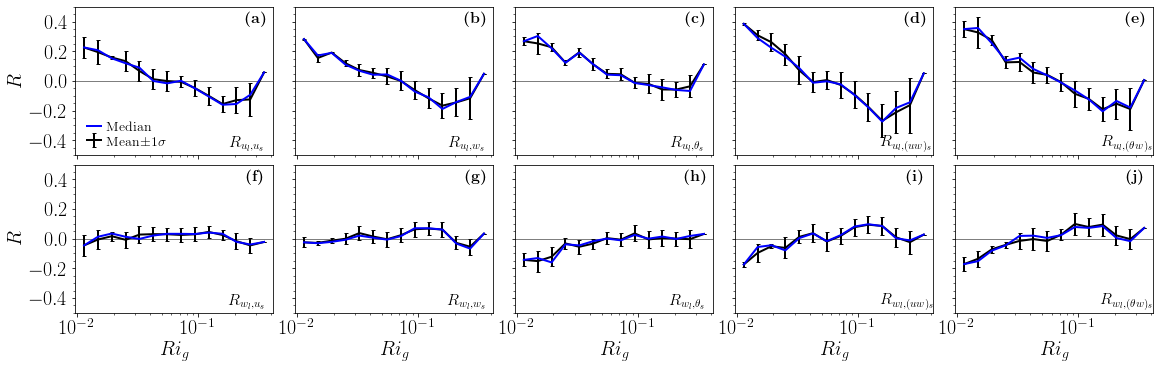

In [18]:
# now can plot using data from Rplot
fig2, ax2 = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,
                         figsize=(16, 5), constrained_layout=True)

# figure 1 - fifteen panels - modulation by u_l and t_l
# row 1 - modulation by u_l
# row 2 - modulation by t_l
# col 1 - modulation of small-scale u by large-scale u&w&t
# col 2 - modulation of small-scale w by large-scale u&w&t
# col 3 - modulation of small-scale theta by large-scale u&w&t
# col 4 - modulation of small-scale uw by large-scale u&w&t
# col 5 - modulation of small-scale tw by large-scale u&w&t
# plot mean and median as lines
# shade std around mean
# (a) R_ul_Eu
# ax2[0,0].plot(Riplot, Rplot["ul_Eu_mean"], ls="-", c="k", lw=2, label="Mean")
ax2[0,0].errorbar(Riplot, Rplot["ul_Eu_mean"], yerr=Rplot["ul_Eu_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[0,0].plot(Riplot, Rplot["ul_Eu_med"], ls="-", c="b", lw=2, label="Median", zorder=1000)

# (b) R_tl_Eu
# ax2[1,0].plot(Riplot, Rplot["tl_Eu_mean"], ls="-", c="k", lw=2)
ax2[1,0].errorbar(Riplot, Rplot["wl_Eu_mean"], yerr=Rplot["wl_Eu_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[1,0].plot(Riplot, Rplot["wl_Eu_med"], ls="-", c="b", lw=2, zorder=1000)

# (c) R_ul_Ew
# ax2[0,1].plot(Riplot, Rplot["ul_Ew_mean"], ls="-", c="k", lw=2)
ax2[0,1].errorbar(Riplot, Rplot["ul_Ew_mean"], yerr=Rplot["ul_Ew_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[0,1].plot(Riplot, Rplot["ul_Ew_med"], ls="-", c="b", lw=2, zorder=1000)

# (d) R_tl_Ew
# ax2[1,1].plot(Riplot, Rplot["tl_Ew_mean"], ls="-", c="k", lw=2)
ax2[1,1].errorbar(Riplot, Rplot["wl_Ew_mean"], yerr=Rplot["wl_Ew_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[1,1].plot(Riplot, Rplot["wl_Ew_med"], ls="-", c="b", lw=2, zorder=1000)

# (e) R_ul_Et
# ax2[0,2].plot(Riplot, Rplot["ul_Et_mean"], ls="-", c="k", lw=2)
ax2[0,2].errorbar(Riplot, Rplot["ul_Et_mean"], yerr=Rplot["ul_Et_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[0,2].plot(Riplot, Rplot["ul_Et_med"], ls="-", c="b", lw=2, zorder=1000)

# (f) R_tl_Et
# ax2[1,2].plot(Riplot, Rplot["tl_Et_mean"], ls="-", c="k", lw=2)
ax2[1,2].errorbar(Riplot, Rplot["wl_Et_mean"], yerr=Rplot["wl_Et_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[1,2].plot(Riplot, Rplot["wl_Et_med"], ls="-", c="b", lw=2, zorder=1000)

# (g) R_ul_Euw
# ax2[0,3].plot(Riplot, Rplot["ul_Euw_mean"], ls="-", c="k", lw=2)
ax2[0,3].errorbar(Riplot, Rplot["ul_Euw_mean"], yerr=Rplot["ul_Euw_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[0,3].plot(Riplot, Rplot["ul_Euw_med"], ls="-", c="b", lw=2, zorder=1000)

# (h) R_tl_Euw
# ax2[1,3].plot(Riplot, Rplot["tl_Euw_mean"], ls="-", c="k", lw=2)
ax2[1,3].errorbar(Riplot, Rplot["wl_Euw_mean"], yerr=Rplot["wl_Euw_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[1,3].plot(Riplot, Rplot["wl_Euw_med"], ls="-", c="b", lw=2, zorder=1000)

# (i) R_ul_Etw
# ax2[0,4].plot(Riplot, Rplot["ul_Etw_mean"], ls="-", c="k", lw=2)
ax2[0,4].errorbar(Riplot, Rplot["ul_Etw_mean"], yerr=Rplot["ul_Etw_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[0,4].plot(Riplot, Rplot["ul_Etw_med"], ls="-", c="b", lw=2, zorder=1000)

# (j) R_wl_Etw
# ax2[1,4].plot(Riplot, Rplot["tl_Etw_mean"], ls="-", c="k", lw=2)
ax2[1,4].errorbar(Riplot, Rplot["wl_Etw_mean"], yerr=Rplot["wl_Etw_std"], 
                  c="k", ls="-", lw=2, label="Mean$\\pm 1 \\sigma$", capsize=2, capthick=1)
ax2[1,4].plot(Riplot, Rplot["wl_Etw_med"], ls="-", c="b", lw=2, zorder=1000)

# axis labels
for iax in ax2[1,:]:
    iax.set_xlabel("$Ri_g$")
for iax in ax2[:,0]:
    iax.set_ylabel("$R$")
# axis limits
ax1[0,0].set_xlim([1e-2, 3e-1])
# ax2[0,0].set_xlim([0, 0.3])
ax2[0,0].set_ylim([-0.5, 0.5])
# major and minor ticks
ax2[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax2[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
# axis scale
ax2[0,0].set_xscale("log")
# legend
ax2[0,0].legend(loc=(0.03, 0.01), labelspacing=0.10, 
                handletextpad=0.4, handlelength=1,
                fontsize=14, frameon=False)
# plot ref lines
for iax in ax2.flatten():
    iax.axhline(0, c="k", ls="-", lw=0.5)
    # iax.axvline(0.5, c="k", ls="-", lw=0.5)
# text labels
ax2[0,0].text(0.25, -0.42, "$R_{u_l,u_s}$", fontsize=16, ha="center", va="center")
ax2[1,0].text(0.25, -0.42, "$R_{w_l,u_s}$", fontsize=16, ha="center", va="center")
ax2[0,1].text(0.25, -0.42, "$R_{u_l,w_s}$", fontsize=16, ha="center", va="center")
ax2[1,1].text(0.25, -0.42, "$R_{w_l,w_s}$", fontsize=16, ha="center", va="center")
ax2[0,2].text(0.25, -0.42, "$R_{u_l,\\theta_s}$", fontsize=16, ha="center", va="center")
ax2[1,2].text(0.25, -0.42, "$R_{w_l,\\theta_s}$", fontsize=16, ha="center", va="center")
ax2[0,3].text(0.25, -0.42, "$R_{u_l,(uw)_s}$", fontsize=16, ha="center", va="center")
ax2[1,3].text(0.25, -0.42, "$R_{w_l,(uw)_s}$", fontsize=16, ha="center", va="center")
ax2[0,4].text(0.25, -0.42, "$R_{u_l,(\\theta w)_s}$", fontsize=16, ha="center", va="center")
ax2[1,4].text(0.25, -0.42, "$R_{w_l,(\\theta w)_s}$", fontsize=16, ha="center", va="center")
# subplot labels
for iax, lab in zip(ax2.flatten(), list("abcdefghij")):
    iax.text(0.3, 0.42, f"$\\textbf{{({{{lab}}})}}$", fontsize=16, ha="center", va="center")

# save
fsave2 = f"{figdir}amp_mod_Rig_bin.pdf"
print(f"Saving figure {fsave2}")
fig2.savefig(fsave2)

### aaaaand plot vs $z/\Lambda$

In [ ]:
# scatter plot
fig2, ax2 = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True,
                         figsize=(12, 16), constrained_layout=True)
for isim, (R, stat) in enumerate(zip(Rall, sall)):
    print(f"Figure 1 - Sim {isim}")
    # grab indices for sbl
    isbl = np.arange(3, stat.nzsbl, dtype=np.int32)
    zzL = stat.z[isbl] / stat.LL[isbl]
    # zzL = stat.LL[isbl]/stat.zj
    # figure 1 - fifteen panels - modulation by u_l and w_l and t_l
    # col 1 - modulation by u_l
    # col 2 - modulation by w_l
    # col 3 - modulation by t_l
    # row 1 - modulation of small-scale u by large-scale u&w&t
    # row 2 - modulation of small-scale w by large-scale u&w&t
    # row 3 - modulation of small-scale theta by large-scale u&w&t
    # row 4 - modulation of small-scale uw by large-scale u&w&t
    # row 5 - modulation of small-scale tw by large-scale u&w&t
    # (a) R_ul_Eu
    ax2[0,0].plot(zzL, R.ul_Eu[isbl], ls="", marker="x", c=cmap1[isim],
                  label=stat.label3)
    # (b) R_wl_Eu
    ax2[0,1].plot(zzL, R.wl_Eu[isbl], ls="", marker="x", c=cmap1[isim])
    # (c) R_tl_Eu
    ax2[0,2].plot(zzL, R.tl_Eu[isbl], ls="", marker="x", c=cmap1[isim])
    # (d) R_ul_Ew
    ax2[1,0].plot(zzL, R.ul_Ew[isbl], ls="", marker="x", c=cmap1[isim])
    # (e) R_wl_Ew
    ax2[1,1].plot(zzL, R.wl_Ew[isbl], ls="", marker="x", c=cmap1[isim])
    # (f) R_tl_Ew
    ax2[1,2].plot(zzL, R.tl_Ew[isbl], ls="", marker="x", c=cmap1[isim])
    # (g) R_ul_Et
    ax2[2,0].plot(zzL, R.ul_Et[isbl], ls="", marker="x", c=cmap1[isim])
    # (h) R_wl_Et
    ax2[2,1].plot(zzL, R.wl_Et[isbl], ls="", marker="x", c=cmap1[isim])
    # (i) R_tl_Et
    ax2[2,2].plot(zzL, R.tl_Et[isbl], ls="", marker="x", c=cmap1[isim])
    # (j) R_ul_Euw
    ax2[3,0].plot(zzL, R.ul_Euw[isbl], ls="", marker="x", c=cmap1[isim])
    # (k) R_wl_Euw
    ax2[3,1].plot(zzL, R.wl_Euw[isbl], ls="", marker="x", c=cmap1[isim])
    # (l) R_tl_Euw
    ax2[3,2].plot(zzL, R.tl_Euw[isbl], ls="", marker="x", c=cmap1[isim])
    # (m) R_ul_Etw
    ax2[4,0].plot(zzL, R.ul_Etw[isbl], ls="", marker="x", c=cmap1[isim])
    # (n) R_wl_Etw
    ax2[4,1].plot(zzL, R.wl_Etw[isbl], ls="", marker="x", c=cmap1[isim])
    # (o) R_wl_Etw
    ax2[4,2].plot(zzL, R.tl_Etw[isbl], ls="", marker="x", c=cmap1[isim])

# OUTSIDE LOOP
# clean up fig 1
ax2[4,0].set_xlabel("$z/\\Lambda$")
# ax2[4,0].set_xlim([1e-2, 1e3])
ax2[0,0].set_ylim([-0.5, 0.5])
ax2[0,0].yaxis.set_major_locator(MultipleLocator(0.2))
ax2[0,0].yaxis.set_minor_locator(MultipleLocator(0.05))
ax2[0,0].set_xscale("log")
ax2[4,1].set_xlabel("$z/\\Lambda$")
ax2[4,2].set_xlabel("$z/\\Lambda$")
ax2[0,0].legend(loc="lower left", labelspacing=0.10, 
                handletextpad=0.4, handlelength=0.75,
                fontsize=14)
# # plot ref lines
for iax in ax2.flatten():
    iax.axhline(0, c="k", ls="-", lw=0.5)
    # iax.axvline(0.5, c="k", ls="-", alpha=0.5)
# y-axis labels
for iax in ax2[:,0]:
    iax.set_ylabel("$R$")
# text labels
ax2[0,0].text(0.03, 0.90, "$R_{u_l,u_s}$", fontsize=16, transform=ax2[0,0].transAxes)
ax2[0,1].text(0.03, 0.90, "$R_{w_l,u_s}$", fontsize=16, transform=ax2[0,1].transAxes)
ax2[0,2].text(0.03, 0.90, "$R_{\\theta_l,u_s}$", fontsize=16, transform=ax2[0,2].transAxes)
ax2[1,0].text(0.03, 0.90, "$R_{u_l,w_s}$", fontsize=16, transform=ax2[1,0].transAxes)
ax2[1,1].text(0.03, 0.90, "$R_{w_l,w_s}$", fontsize=16, transform=ax2[1,1].transAxes)
ax2[1,2].text(0.03, 0.90, "$R_{\\theta_l,w_s}$", fontsize=16, transform=ax2[1,2].transAxes)
ax2[2,0].text(0.03, 0.90, "$R_{u_l,\\theta_s}$", fontsize=16, transform=ax2[2,0].transAxes)
ax2[2,1].text(0.03, 0.90, "$R_{w_l,\\theta_s}$", fontsize=16, transform=ax2[2,1].transAxes)
ax2[2,2].text(0.03, 0.90, "$R_{\\theta_l,\\theta_s}$", fontsize=16, transform=ax2[2,2].transAxes)
ax2[3,0].text(0.03, 0.90, "$R_{u_l,(uw)_s}$", fontsize=16, transform=ax2[3,0].transAxes)
ax2[3,1].text(0.03, 0.90, "$R_{w_l,(uw)_s}$", fontsize=16, transform=ax2[3,1].transAxes)
ax2[3,2].text(0.03, 0.90, "$R_{\\theta_l,(uw)_s}$", fontsize=16, transform=ax2[3,2].transAxes)
ax2[4,0].text(0.03, 0.90, "$R_{u_l,(\\theta w)_s}$", fontsize=16, transform=ax2[4,0].transAxes)
ax2[4,1].text(0.03, 0.90, "$R_{w_l,(\\theta w)_s}$", fontsize=16, transform=ax2[4,1].transAxes)
ax2[4,2].text(0.03, 0.90, "$R_{\\theta_l,(\\theta w)_s}$", fontsize=16, transform=ax2[4,2].transAxes)

# save
fsave2 = f"{figdir}amp_mod_all_vs_zzL_scatter.pdf"
print(f"Saving figure {fsave2}")
# fig2.savefig(fsave2)
# plt.close(fig1)